# 0. Importar bibliotecas

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import dendrogram, linkage
import time
from datetime import datetime

# 1. Entendimento dos Dados

## 1.1 Leitura da Base de Público

In [ ]:
df_publico = pd.read_csv('/content/tb_crm_clientes.csv')
df_publico.head()

,IDCliente,AnoDeNascimento,NivelDeEducacao,EstadoCivil,RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DataDeInscricao,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,...,VisitasAoSiteNoUltimoMes,AceitouCampanha3,AceitouCampanha4,AceitouCampanha5,AceitouCampanha1,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha
0,5524,1957,Graduação,Solteiro(a),58138.0,0,0,2021-04-09,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduação,Solteiro(a),46344.0,1,1,2023-08-03,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduação,União Estável,71613.0,0,0,2022-08-21,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduação,União Estável,26646.0,1,0,2023-10-02,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,Doutorado,Casado(a),58293.0,1,0,2023-01-19,94,173,...,5,0,0,0,0,0,0,3,11,0


## 1.2 Análise da Base do Estudo

Nesse primeiro momento, analisa-se os tipos de cada variável assim como preenchimento e cardinalidade.

In [ ]:
# Metadados referente ao conjunto de dados
def pod_academy_generate_metadata(dataframe):
    """
    Gera um dataframe contendo metadados das colunas do dataframe fornecido.

    :param dataframe: DataFrame para o qual os metadados serão gerados.
    :return: DataFrame contendo metadados.
    """

    # Coleta de metadados básicos
    metadata = pd.DataFrame({
        'nome_variavel': dataframe.columns,
        'tipo': dataframe.dtypes,
        'qt_nulos': dataframe.isnull().sum(),
        'percent_nulos': round((dataframe.isnull().sum() / len(dataframe))* 100,2),
        'cardinalidade': dataframe.nunique(),
    })
    metadata=metadata.sort_values(by='percent_nulos',ascending=False)
    metadata = metadata.reset_index(drop=True)

    return metadata

In [ ]:
pod_academy_generate_metadata(df_publico)

,nome_variavel,tipo,qt_nulos,percent_nulos,cardinalidade
0,RendaAnualFamiliar,float64,24,1.07,1974
1,IDCliente,int64,0,0.00,2240
2,ComprasComDesconto,int64,0,0.00,15
3,IndicadorDeReceita,int64,0,0.00,1
4,IndicadorCustoContato,int64,0,0.00,1
5,ReclamouNosUltimos2Anos,int64,0,0.00,2
6,AceitouCampanha2,int64,0,0.00,2
7,AceitouCampanha1,int64,0,0.00,2
8,AceitouCampanha5,int64,0,0.00,2
9,AceitouCampanha4,int64,0,0.00,2


### 1.2.1 Estatística Descritiva

In [ ]:
df_publico.describe()

,IDCliente,AnoDeNascimento,RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,GastoComFrutasNosUltimos2Anos,GastoComCarneNosUltimos2Anos,GastoComPeixeNosUltimos2Anos,...,VisitasAoSiteNoUltimoMes,AceitouCampanha3,AceitouCampanha4,AceitouCampanha5,AceitouCampanha1,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


### 1.2.2 Taxa de aceitação (Cliente que aceitou pelo menos uma das campanhas)

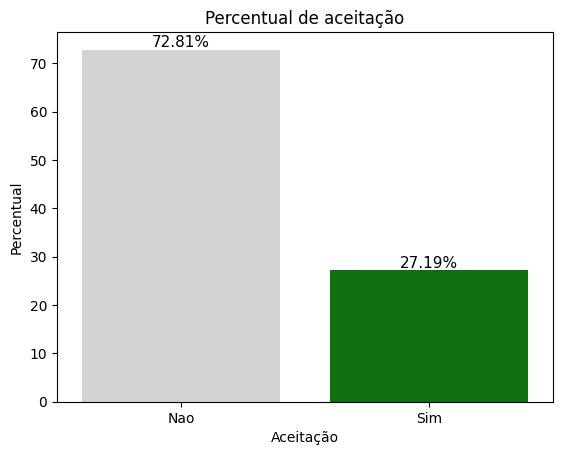

In [ ]:
# Criar uma variável para marcar se o cliente aceitou alguma campanha
df_publico['AceitouAlgumaCampanha'] = df_publico[['AceitouCampanha1', 'AceitouCampanha2', 'AceitouCampanha3', 'AceitouCampanha4', 'AceitouCampanha5', 'AceitouUltimaCampanha']].any(axis=1).astype(int)

aceitacao_counts = df_publico['AceitouAlgumaCampanha'].value_counts()

# Calculando os percentuais de aceitacao
percent_nao = (aceitacao_counts[0] / len(df_publico)) * 100
percent_sim = (aceitacao_counts[1] / len(df_publico)) * 100

# Criando o DataFrame total_by_aceitacao
total_by_aceitacao = pd.DataFrame({'AceitouAlgumaCampanha': ['Nao', 'Sim'], 'Percent': [percent_nao, percent_sim]})

# Definindo as cores
cores = {'Nao': 'lightgrey', 'Sim': 'green'}

# Plotando o gráfico de barras com seaborn
ax = sns.barplot(x='AceitouAlgumaCampanha', y='Percent', hue='AceitouAlgumaCampanha', data=total_by_aceitacao, palette=cores, dodge=False)

# Adicionando os valores de cada barra com símbolo de porcentagem
for p in ax.patches:
    ax.annotate("{:.2f}%".format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=11, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Aceitação')
plt.ylabel('Percentual')
plt.title('Percentual de aceitação')
plt.show()

### 1.2.3 Distribuição de Renda Anual Familiar e Taxa de aceitação por Faixa de Renda Anual Familiar (Cliente que aceitou pelo menos uma das campanhas)

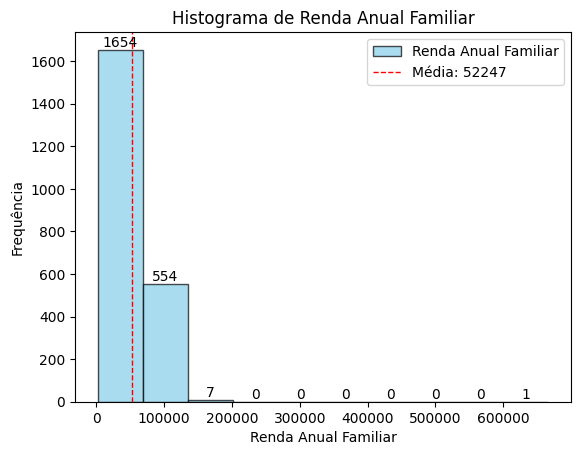

In [ ]:
# Plotando o histograma das idades
hist, bins, _ = plt.hist(df_publico['RendaAnualFamiliar'], bins=10, color='skyblue', edgecolor='black', alpha=0.7, label='Renda Anual Familiar')

# Calculando a média das idades
media_renda = df_publico['RendaAnualFamiliar'].mean()

# Adicionando a linha vertical para a média
plt.axvline(media_renda, color='red', linestyle='dashed', linewidth=1)
plt.legend(['Renda Anual Familiar', 'Média: {:.0f}'.format(media_renda)], loc='upper right')

# Adicionando os valores da frequência em cada barra
for i in range(len(hist)):
    plt.text(bins[i] + (bins[i+1] - bins[i]) / 2, hist[i], str(int(hist[i])), ha='center', va='bottom')

# Configurando os rótulos e título
plt.xlabel('Renda Anual Familiar')
plt.ylabel('Frequência')
plt.title('Histograma de Renda Anual Familiar')

# Mostrando o gráfico
plt.show()

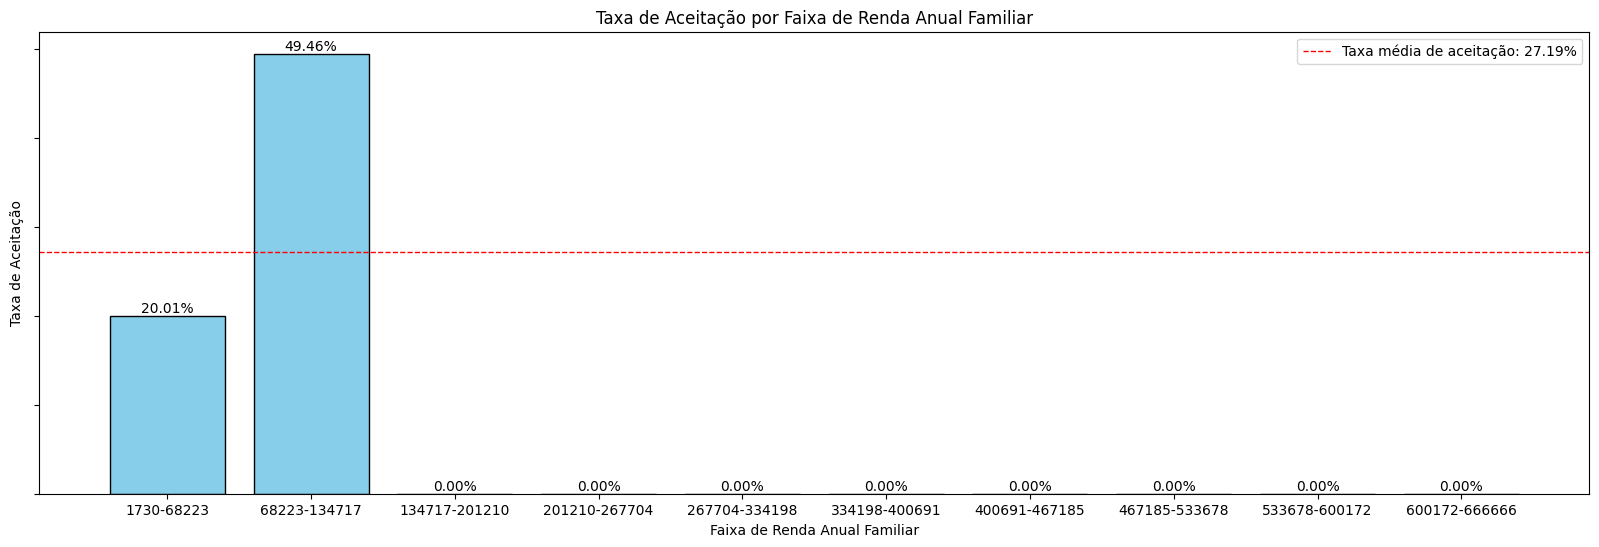

In [ ]:
taxa_aceitacao_por_faixa = []
for i in range(len(bins)-1):
    faixa_inferior = bins[i]
    faixa_superior = bins[i+1]
    taxa_aceitacao = df_publico[(df_publico['RendaAnualFamiliar'] >= faixa_inferior) & (df_publico['RendaAnualFamiliar'] < faixa_superior)]['AceitouAlgumaCampanha'].value_counts(normalize=True).get(1, 0)
    taxa_aceitacao_por_faixa.append(taxa_aceitacao)

# Calculando a média da variável de aceitacao
taxa_media_aceitacao = df_publico['AceitouAlgumaCampanha'].value_counts(normalize=True).get(1, 0)

# Plotando o gráfico de barras
plt.figure(figsize=(20,6))
plt.bar(range(len(bins)-1), taxa_aceitacao_por_faixa, color='skyblue', edgecolor='black')

# Adicionando os valores das taxas de aceitacao nas barras
for i, taxa in enumerate(taxa_aceitacao_por_faixa):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

# Adicionando uma linha indicando a média da variável de aceitacao
plt.axhline(taxa_media_aceitacao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de aceitação: {:.2f}%'.format(taxa_media_aceitacao * 100))

# Adicionando as faixas de idade no eixo x
plt.xticks(range(len(bins)-1), ['{}-{}'.format(int(faixa_inf), int(faixa_sup)) for faixa_inf, faixa_sup in zip(bins[:-1], bins[1:])])

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando rótulos e título
plt.xlabel('Faixa de Renda Anual Familiar')
plt.ylabel('Taxa de Aceitação')
plt.title('Taxa de Aceitação por Faixa de Renda Anual Familiar')

# Adicionando a legenda
plt.legend()

# Mostrando o gráfico
plt.show()

### 1.2.4 Quantidade de Clientes por Nível de Educação e Taxa de aceitação por Nível de Educação (Cliente que aceitou pelo menos uma das campanhas)

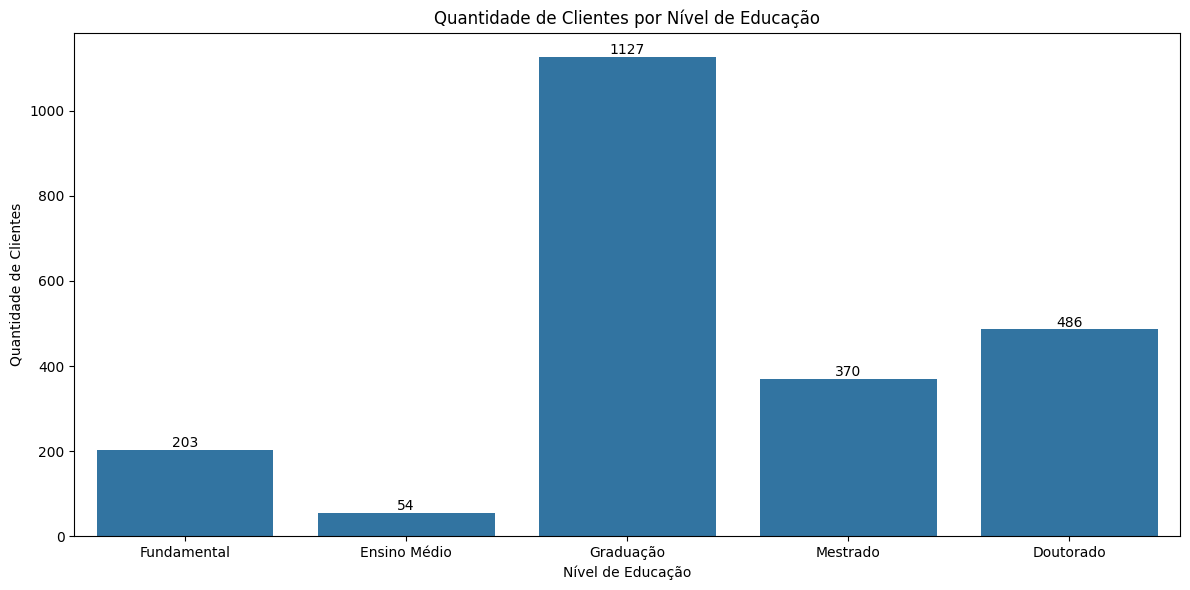

In [ ]:
# Definindo a ordem das categorias
ordem_educacao = ['Fundamental', 'Ensino Médio', 'Graduação', 'Mestrado', 'Doutorado']

# Contando as ocorrências de cada categoria na variável 'NivelDeEducacao' e ordenando em ordem decrescente
funcao_counts = df_publico['NivelDeEducacao'].value_counts().reindex(ordem_educacao)

plt.figure(figsize=(12, 6))

# Plotando o gráfico de barras com seaborn e deixando o Seaborn gerenciar as cores
ax = sns.countplot(x='NivelDeEducacao', data=df_publico, order=ordem_educacao)

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Nível de Educação')
plt.ylabel('Quantidade de Clientes')
plt.title('Quantidade de Clientes por Nível de Educação')
plt.tight_layout()
plt.show()

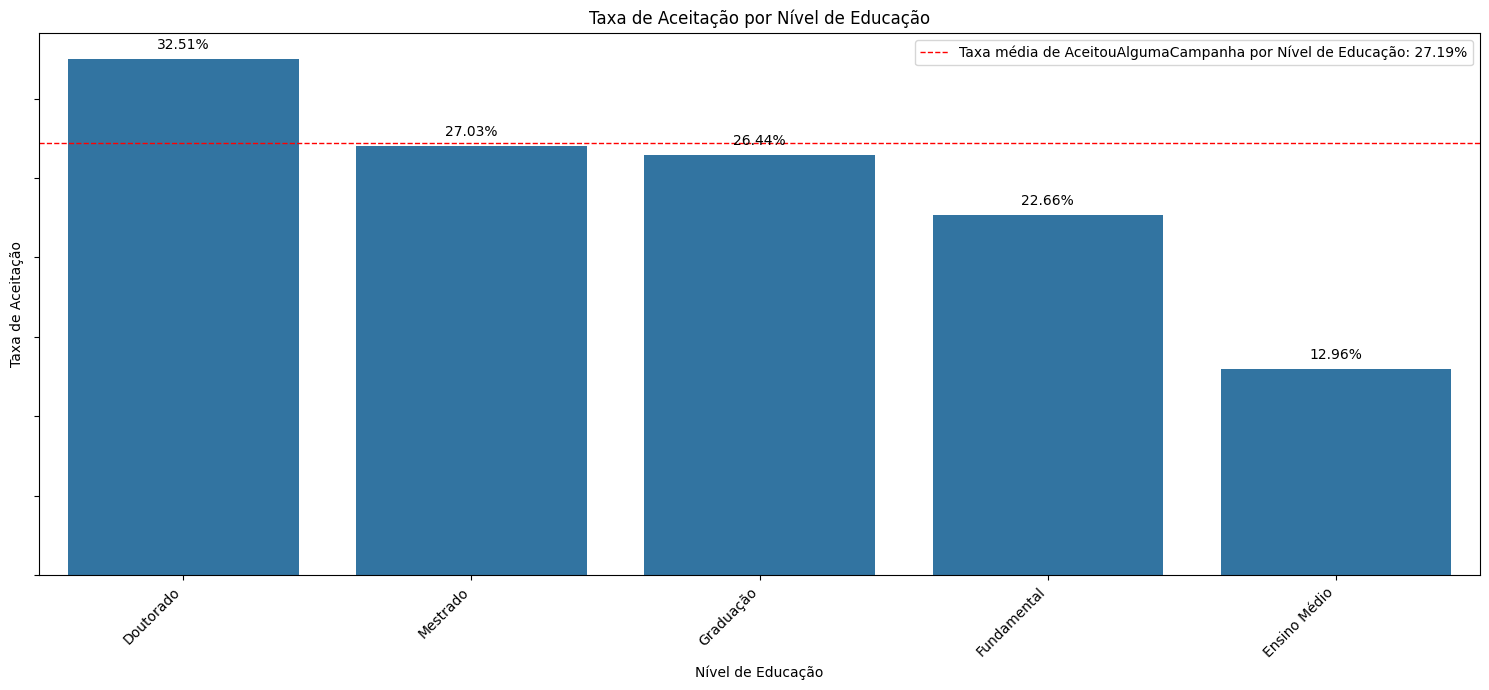

In [ ]:
# Calculando a taxa de aceitacao para cada função
taxa_aceitacao_por_funcao = df_publico.groupby('NivelDeEducacao')['AceitouAlgumaCampanha'].apply(lambda x: (x == 1).mean())

# Ordenando as funções por taxa de aceitacao
funcoes_ordenadas = taxa_aceitacao_por_funcao.sort_values(ascending=False)

plt.figure(figsize=(15,7))

# Plotando o gráfico de barras com cor azul
ax = sns.barplot(x=funcoes_ordenadas.index, y=funcoes_ordenadas.values)

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando uma linha indicando a taxa média de Aceitação
taxa_media_aceitacao_funcao = df_publico['AceitouAlgumaCampanha'].value_counts(normalize=True).get(1, 0)
plt.axhline(taxa_media_aceitacao_funcao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de AceitouAlgumaCampanha por Nível de Educação: {:.2f}%'.format(taxa_media_aceitacao_funcao * 100))

plt.xlabel('Nível de Educação')
plt.ylabel('Taxa de Aceitação')
plt.title('Taxa de Aceitação por Nível de Educação')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionando a legenda
plt.legend()

plt.show()

Observa-se que:

* 50% dos clientes possuem, no máximo, nível de educação de graduação;
* 88,5% dos clientes possuem, no mínimo, ensino superior;
* O público com doutorado apresentou a maior taxa de aceitação em pelo menos uma das campanhas ofertadas.


### 1.2.5 Quantidade de Clientes por Estado Civil e Taxa de aceitação por Estado Civil (Cliente que aceitou pelo menos uma das campanhas)

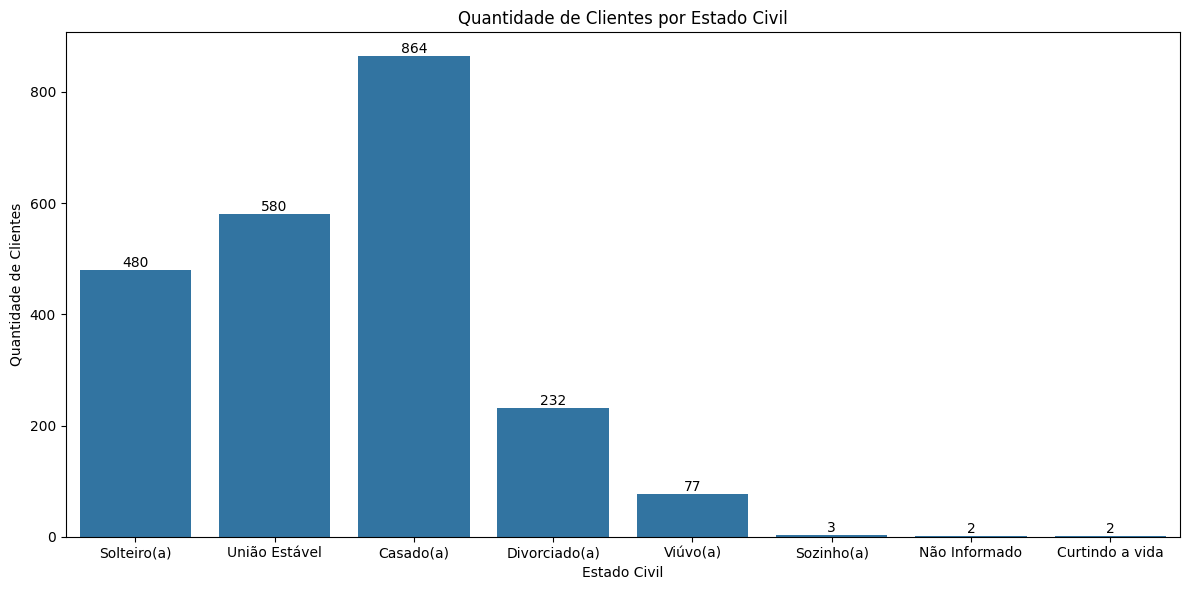

In [ ]:
plt.figure(figsize=(12, 6))

# Plotando o gráfico de barras com seaborn e deixando o Seaborn gerenciar as cores
ax = sns.countplot(x='EstadoCivil', data=df_publico)

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.0f}'.format(p.get_height()), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.xlabel('Estado Civil')
plt.ylabel('Quantidade de Clientes')
plt.title('Quantidade de Clientes por Estado Civil')
plt.tight_layout()
plt.show()

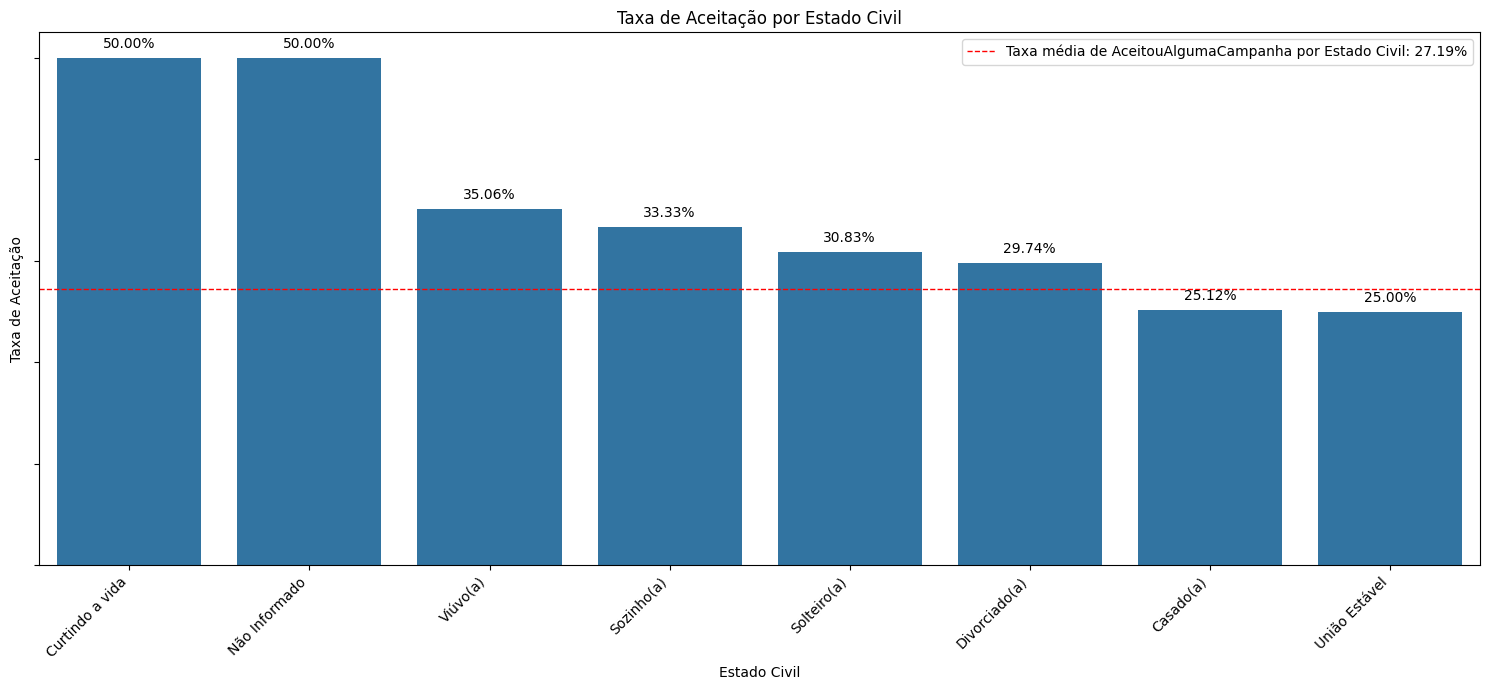

In [ ]:
# Calculando a taxa de aceitacao para cada função
taxa_aceitacao_por_funcao = df_publico.groupby('EstadoCivil')['AceitouAlgumaCampanha'].apply(lambda x: (x == 1).mean())

# Ordenando as funções por taxa de aceitacao
funcoes_ordenadas = taxa_aceitacao_por_funcao.sort_values(ascending=False)

plt.figure(figsize=(15,7))

# Plotando o gráfico de barras com cor azul
ax = sns.barplot(x=funcoes_ordenadas.index, y=funcoes_ordenadas.values)

# Adicionando os valores de cada barra
for p in ax.patches:
    ax.annotate('{:.2f}%'.format(p.get_height() * 100), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black', xytext=(0, 5),
                textcoords='offset points')

plt.gca().axes.yaxis.set_ticklabels([])

# Adicionando uma linha indicando a taxa média de Aceitação
taxa_media_aceitacao_funcao = df_publico['AceitouAlgumaCampanha'].value_counts(normalize=True).get(1, 0)
plt.axhline(taxa_media_aceitacao_funcao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de AceitouAlgumaCampanha por Estado Civil: {:.2f}%'.format(taxa_media_aceitacao_funcao * 100))

plt.xlabel('Estado Civil')
plt.ylabel('Taxa de Aceitação')
plt.title('Taxa de Aceitação por Estado Civil')
plt.xticks(rotation=45, ha='right')  # Rotaciona os rótulos do eixo x para melhor visualização
plt.tight_layout()  # Ajusta o layout para evitar sobreposição de elementos

# Adicionando a legenda
plt.legend()

plt.show()

Nota-se que:

* A maioria dos clientes (38,57%) é casada;
* Os segmentos com as menores taxas de aceitação são os de clientes casados e em união estável;
* Os demais segmentos apresentam taxas de aceitação acima da média.


# 2. Preparação dos Dados

## 2.1 Feature Engineering

In [ ]:
ano_atual = datetime.now().year
data_atual = datetime.now()

# Criando a variável 'Idade'
df_publico['Idade'] = ano_atual - df_publico['AnoDeNascimento']

# Ajustando o tipo da variável DataDeInscricao
df_publico['DataDeInscricao'] = pd.to_datetime(df_publico['DataDeInscricao'])

# Calculando a quantidade de dias desde a inscrição
df_publico['DiasDesdeInscricao'] = (data_atual - df_publico['DataDeInscricao']).dt.days

# Criar uma variável contando a quantidade de pessoas na residência de cada cliente
def calcular_total_pessoas(row):
    if row['EstadoCivil'] == 'Casado(a)' or row['EstadoCivil'] == 'União Estável':
        return row['QtdDeCriancasNaCasa'] + row['QtdDeAdolescentesNaCasa'] + 2
    else:
        return row['QtdDeCriancasNaCasa'] + row['QtdDeAdolescentesNaCasa'] + 1

# Aplicando a função para calcular a quantidade total de pessoas na casa
df_publico['TotalPessoasNaCasa'] = df_publico.apply(calcular_total_pessoas, axis=1)

# Calcular a renda per capita familiar
df_publico['RendaAnualPerCapitaFamiliar'] = df_publico['RendaAnualFamiliar'] / df_publico['TotalPessoasNaCasa']



In [ ]:
df_publico.head()

,IDCliente,AnoDeNascimento,NivelDeEducacao,EstadoCivil,RendaAnualFamiliar,QtdDeCriancasNaCasa,QtdDeAdolescentesNaCasa,DataDeInscricao,DiasDesdeUltimaCompra,GastoComVinhoNosUltimos2Anos,...,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha,AceitouAlgumaCampanha,Idade,DiasDesdeInscricao,TotalPessoasNaCasa,RendaAnualPerCapitaFamiliar
0,5524,1957,Graduação,Solteiro(a),58138.0,0,0,2021-04-09,58,635,...,0,0,3,11,1,1,67,1255,1,58138.0
1,2174,1954,Graduação,Solteiro(a),46344.0,1,1,2023-08-03,38,11,...,0,0,3,11,0,0,70,409,3,15448.0
2,4141,1965,Graduação,União Estável,71613.0,0,0,2022-08-21,26,426,...,0,0,3,11,0,0,59,756,2,35806.5
3,6182,1984,Graduação,União Estável,26646.0,1,0,2023-10-02,26,11,...,0,0,3,11,0,0,40,349,3,8882.0
4,5324,1981,Doutorado,Casado(a),58293.0,1,0,2023-01-19,94,173,...,0,0,3,11,0,0,43,605,3,19431.0


## 2.2 Encoding

In [ ]:
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler, OneHotEncoder
from sklearn.preprocessing import StandardScaler
import pandas as pd

X = df_publico.drop(columns=['IDCliente','AnoDeNascimento','DataDeInscricao'])

cat_attributes = X.select_dtypes(include='object')
num_attributes = X.select_dtypes(exclude='object')

# Define categorical pipeline
cat_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(drop='first'))
])

# Define numerical pipeline with RobustScaler
num_pipe = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', RobustScaler())
])

# Combine categorical and numerical pipelines
preprocessor = ColumnTransformer([
    ('cat', cat_pipe, cat_attributes.columns),
    ('num', num_pipe, num_attributes.columns)
])

pipeline = Pipeline(steps=[("preprocessor", preprocessor)])

# Aplica o pipeline à base de dados
X_processed = pipeline.fit_transform(X)

# Obtém os nomes das colunas após o one-hot encoding
encoded_cat_columns = pipeline.named_steps['preprocessor'].named_transformers_['cat'].named_steps['onehot']\
    .get_feature_names_out(input_features=cat_attributes.columns)

# Combina os nomes das colunas categóricas codificadas e as colunas numéricas
all_columns = list(encoded_cat_columns) + list(num_attributes.columns)

# Cria um DataFrame com as colunas pré-processadas e seus nomes
df_X_processed = pd.DataFrame(X_processed, columns=all_columns)

In [ ]:
df_X_processed.head()

,NivelDeEducacao_Ensino Médio,NivelDeEducacao_Fundamental,NivelDeEducacao_Graduação,NivelDeEducacao_Mestrado,EstadoCivil_Curtindo a vida,EstadoCivil_Divorciado(a),EstadoCivil_Não Informado,EstadoCivil_Solteiro(a),EstadoCivil_Sozinho(a),EstadoCivil_União Estável,...,AceitouCampanha2,ReclamouNosUltimos2Anos,IndicadorCustoContato,IndicadorDeReceita,AceitouUltimaCampanha,AceitouAlgumaCampanha,Idade,DiasDesdeInscricao,TotalPessoasNaCasa,RendaAnualPerCapitaFamiliar
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.722222,1.329463,-2.0,1.993980
1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.888889,-1.126270,0.0,-0.170068
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.277778,-0.119013,-1.0,0.861948
3,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.777778,-1.300435,0.0,-0.502913
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,-0.611111,-0.557329,0.0,0.031839


## 2.3 Redução de Dimensionalidade

In [ ]:
df_X_processed.shape

(2240, 40)

In [ ]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 0.75)
pca.fit(df_X_processed)
df_reduced = pca.transform(df_X_processed)
df_reduced.shape

(2240, 8)

# 3. Modelagem

### 4.1.1 Método da Silhueta para escolha do número de Clusters

Iteração número: 0 - Coeficiente de Silhueta: 0.4209186867831444 - Tempo gasto na iteração: 0.5658001899719238 segundos
Iteração número: 1 - Coeficiente de Silhueta: 0.2804536114167466 - Tempo gasto na iteração: 0.37076497077941895 segundos
Iteração número: 2 - Coeficiente de Silhueta: 0.27738001262815115 - Tempo gasto na iteração: 0.3944566249847412 segundos
Iteração número: 3 - Coeficiente de Silhueta: 0.18441449133557505 - Tempo gasto na iteração: 0.3812236785888672 segundos
Iteração número: 4 - Coeficiente de Silhueta: 0.18493661014846122 - Tempo gasto na iteração: 0.4356365203857422 segundos
Iteração número: 5 - Coeficiente de Silhueta: 0.18586475339006542 - Tempo gasto na iteração: 0.35379624366760254 segundos
Iteração número: 6 - Coeficiente de Silhueta: 0.1922822791274165 - Tempo gasto na iteração: 0.3752608299255371 segundos
Iteração número: 7 - Coeficiente de Silhueta: 0.19119391111735753 - Tempo gasto na iteração: 0.30664992332458496 segundos


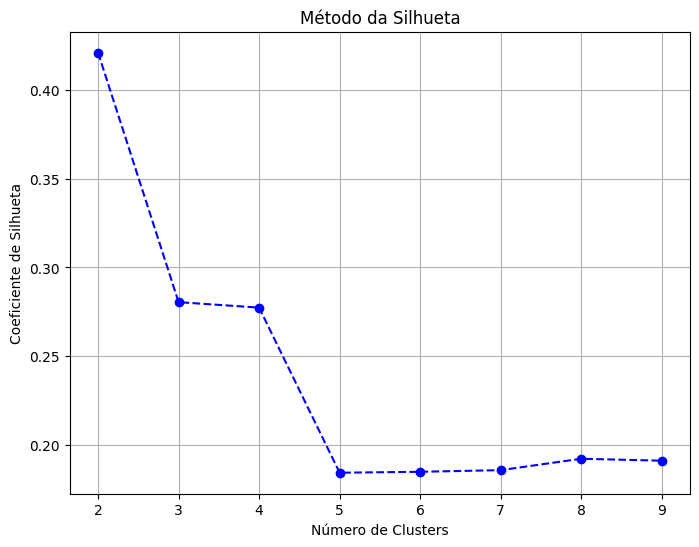

In [ ]:
# Calcular a pontuação da silhueta para diferentes números de clusters
silhouette_scores = []
i = 0
k_min = 2
k_max = 10

for n_clusters in range(k_min, k_max):
    start_time = time.time()
    kmeans = KMeans(n_clusters=n_clusters, random_state=0, n_init='auto')
    cluster_labels = kmeans.fit_predict(df_reduced)
    # gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    # gmm.fit(df_reduced)
    # cluster_labels = gmm.predict(df_reduced)

    # spectral_clustering = SpectralClustering(n_clusters=n_clusters, affinity='rbf', gamma=15, random_state=42)
    # cluster_labels = spectral_clustering.fit_predict(df_reduced)
    silhouette_avg = silhouette_score(df_reduced, cluster_labels)
    silhouette_scores.append(silhouette_avg)

    end_time = time.time()
    elapsed_time = end_time - start_time

    print(f'Iteração número: {i} - Coeficiente de Silhueta: {silhouette_avg} - Tempo gasto na iteração: {elapsed_time} segundos')
    i += 1

# Plotar o gráfico do método da silhueta
plt.figure(figsize=(8, 6))
plt.plot(range(k_min, k_max), silhouette_scores, marker='o', linestyle='--', color='b')
plt.xlabel('Número de Clusters')
plt.ylabel('Coeficiente de Silhueta')
plt.title('Método da Silhueta')
plt.xticks(range(k_min, k_max))
plt.grid(True)
plt.show()

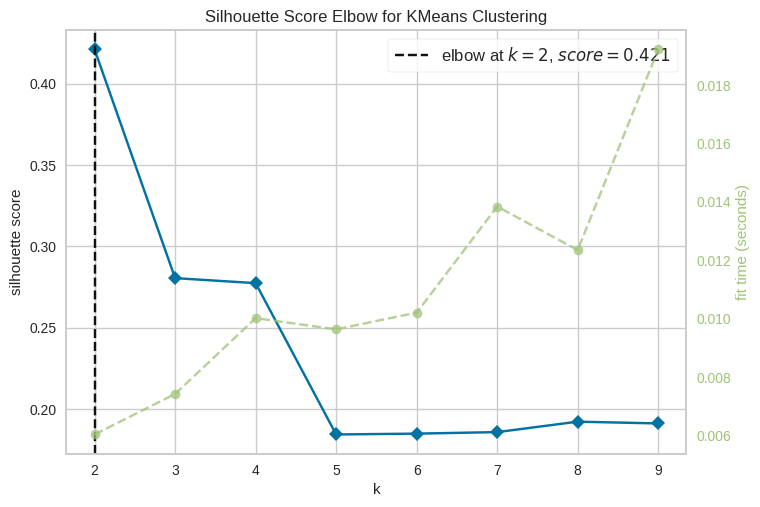

In [ ]:
# Silhouette Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans(random_state=0, n_init='auto')
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,10),metric='silhouette', timings= True);
visualizer.fit(df_reduced)        # Fit the data to the visualizer
visualizer.show();        # Finalize and render the figure

### 3.1.2 Treinar modelo de Clusterização

In [ ]:
from sklearn.mixture import GaussianMixture

n_components = range(1, 10)
covariance_type = ['spherical', 'tied', 'diag', 'full']
best_bic = float('inf')  # Inicialize com um valor infinito
best_config = None
bic_scores = []

for cov in covariance_type:
    for n_comp in n_components:
        gmm = GaussianMixture(n_components=n_comp, covariance_type=cov, random_state=0)
        gmm.fit(df_reduced)
        bic_score = gmm.bic(df_reduced)
        bic_scores.append((cov, n_comp, bic_score))

        if bic_score < best_bic:
            best_bic = bic_score
            best_config = (cov, n_comp)

print("Melhor configuração:", best_config)
print("Menor BIC:", best_bic)

Melhor configuração: ('full', 8)
Menor BIC: 34168.27724874478


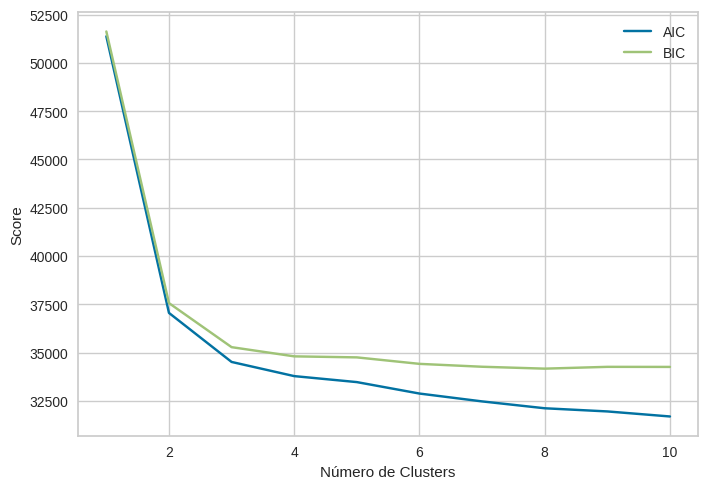

In [ ]:
from sklearn.mixture import GaussianMixture
import numpy as np

# Lista para armazenar valores de AIC e BIC
aic_scores = []
bic_scores = []

# Testar diferentes números de clusters
for n_clusters in range(1, 11):
    gmm = GaussianMixture(n_components=n_clusters, covariance_type='full', random_state=0)
    gmm.fit(df_reduced)
    aic_scores.append(gmm.aic(df_reduced))
    bic_scores.append(gmm.bic(df_reduced))

# Plotar AIC e BIC em função do número de clusters

plt.plot(range(1, 11), aic_scores, label='AIC')
plt.plot(range(1, 11), bic_scores, label='BIC')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.legend()
plt.show()

In [ ]:
from sklearn.mixture import GaussianMixture
# Inicializar o modelo de Mistura Gaussiana
gmm = GaussianMixture(n_components=8, covariance_type='full', random_state=0)

# Ajustar o modelo aos dados com parâmetros de inicialização específicos
gmm.fit(df_reduced)

# Prever os rótulos dos clusters
labels = gmm.predict(df_reduced)

df_publico['Cluster'] = labels

np.unique(labels)

array([0, 1, 2, 3, 4, 5, 6, 7])

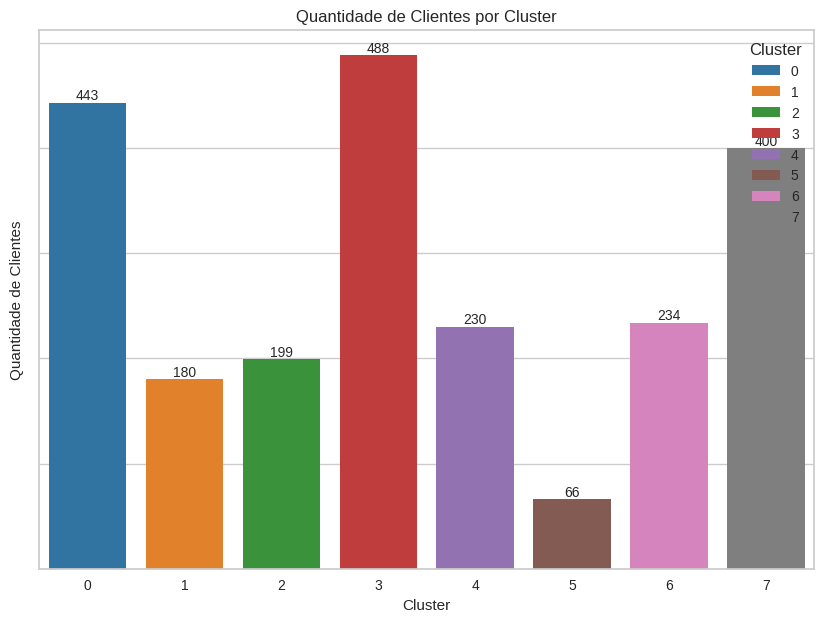

In [ ]:
pal = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
pal = pal[:len(np.unique(labels))]

plt.figure(figsize=(10,7))
pl = sns.countplot(data=df_publico, x="Cluster",hue="Cluster",palette=pal)

for i in range(len(pl.containers)):
  pl.bar_label(pl.containers[i], fontsize=10)
pl.set_title("Quantidade de Clientes por Cluster")
plt.gca().axes.yaxis.set_ticklabels([])
plt.ylabel('Quantidade de Clientes')
plt.show()

Nota-se que:

* 21,79% dos clientes estão concentrados no cluster 3;
* O segundo cluster com maior participação é o cluster 1, representando 19,78% do total;
* O cluster 0 apresentou a menor participação, correspondendo a aproximadamente 2,95% do total.


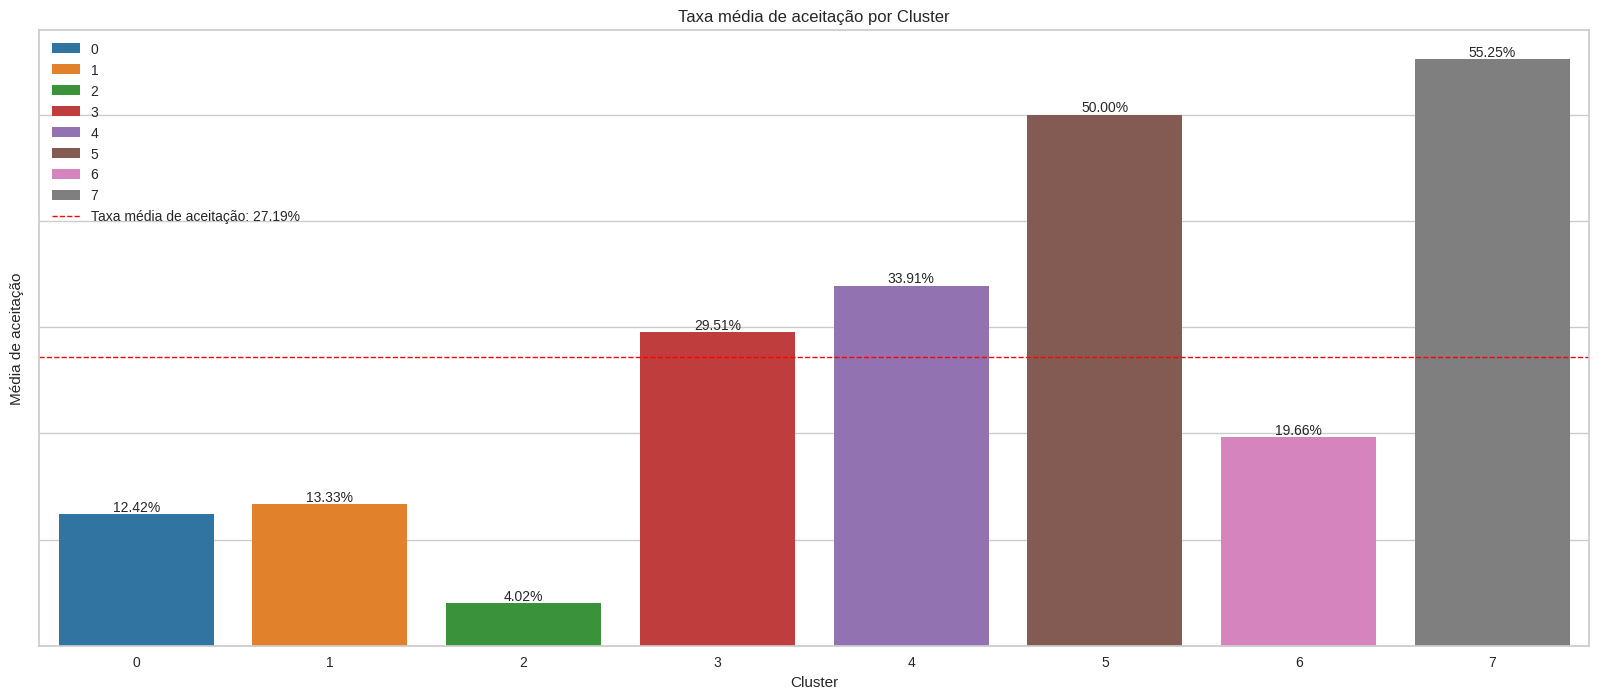

In [ ]:
df_publico['TARGET'] = (df_publico['AceitouAlgumaCampanha'] == 1).astype(int)

# Calcular a média da variável "AceitouAlgumaCampanha" para cada cluster
mean_aceitacao_by_cluster = df_publico.groupby("Cluster")["TARGET"].mean().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(20, 8))
sns.barplot(x="Cluster", y="TARGET", data=mean_aceitacao_by_cluster, palette=pal, hue="Cluster")
plt.axhline(taxa_media_aceitacao, color='red', linestyle='dashed', linewidth=1, label='Taxa média de aceitação: {:.2f}%'.format(taxa_media_aceitacao * 100))

plt.title("Taxa média de aceitação por Cluster")
plt.xlabel("Cluster")
plt.ylabel("Média de aceitação")



# Adicionando os valores das taxas de aceitacao nas barras
for i, taxa in enumerate(mean_aceitacao_by_cluster.TARGET.values):
    plt.text(i, taxa, '{:.2f}%'.format(taxa * 100), ha='center', va='bottom', fontsize=10)

plt.gca().axes.yaxis.set_ticklabels([])
plt.legend()
plt.show()

Verifica-se que:

* Os clusters 3, 4, 5 e 7 apresentam as maiores taxas de aceitação, com 29,51%, 33,91%, 50,00% e 55,25%, respectivamente;
* Os demais clusters estão abaixo da média de aceitação.


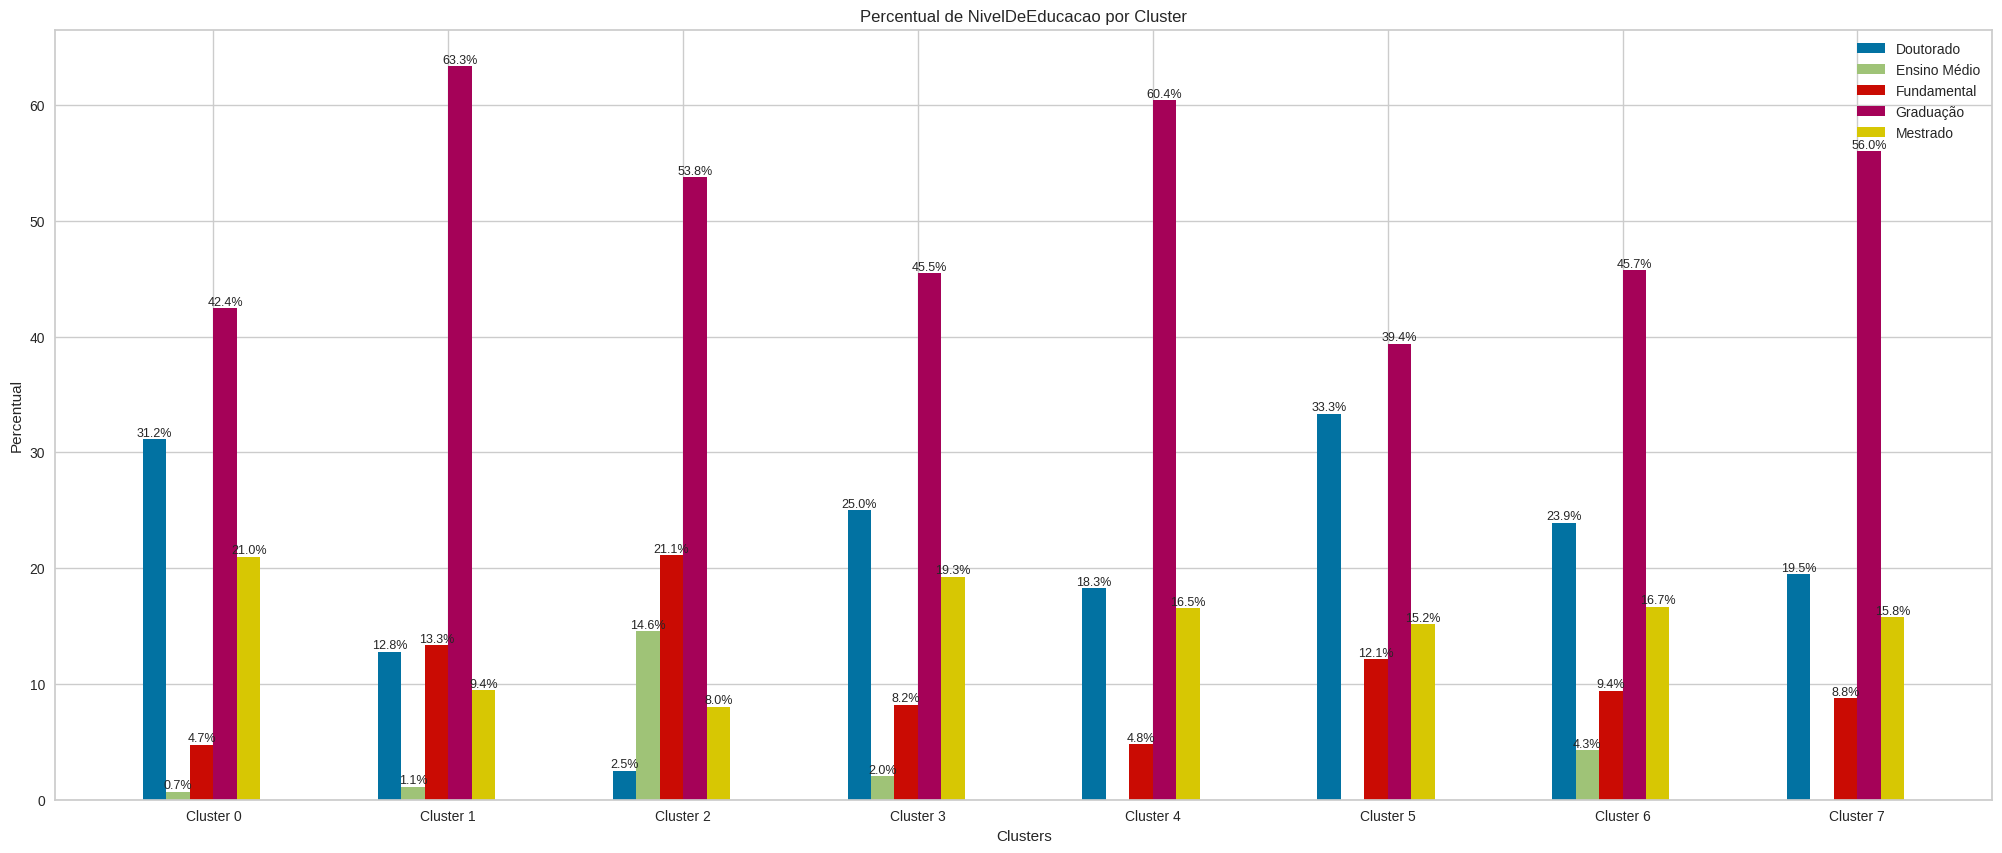

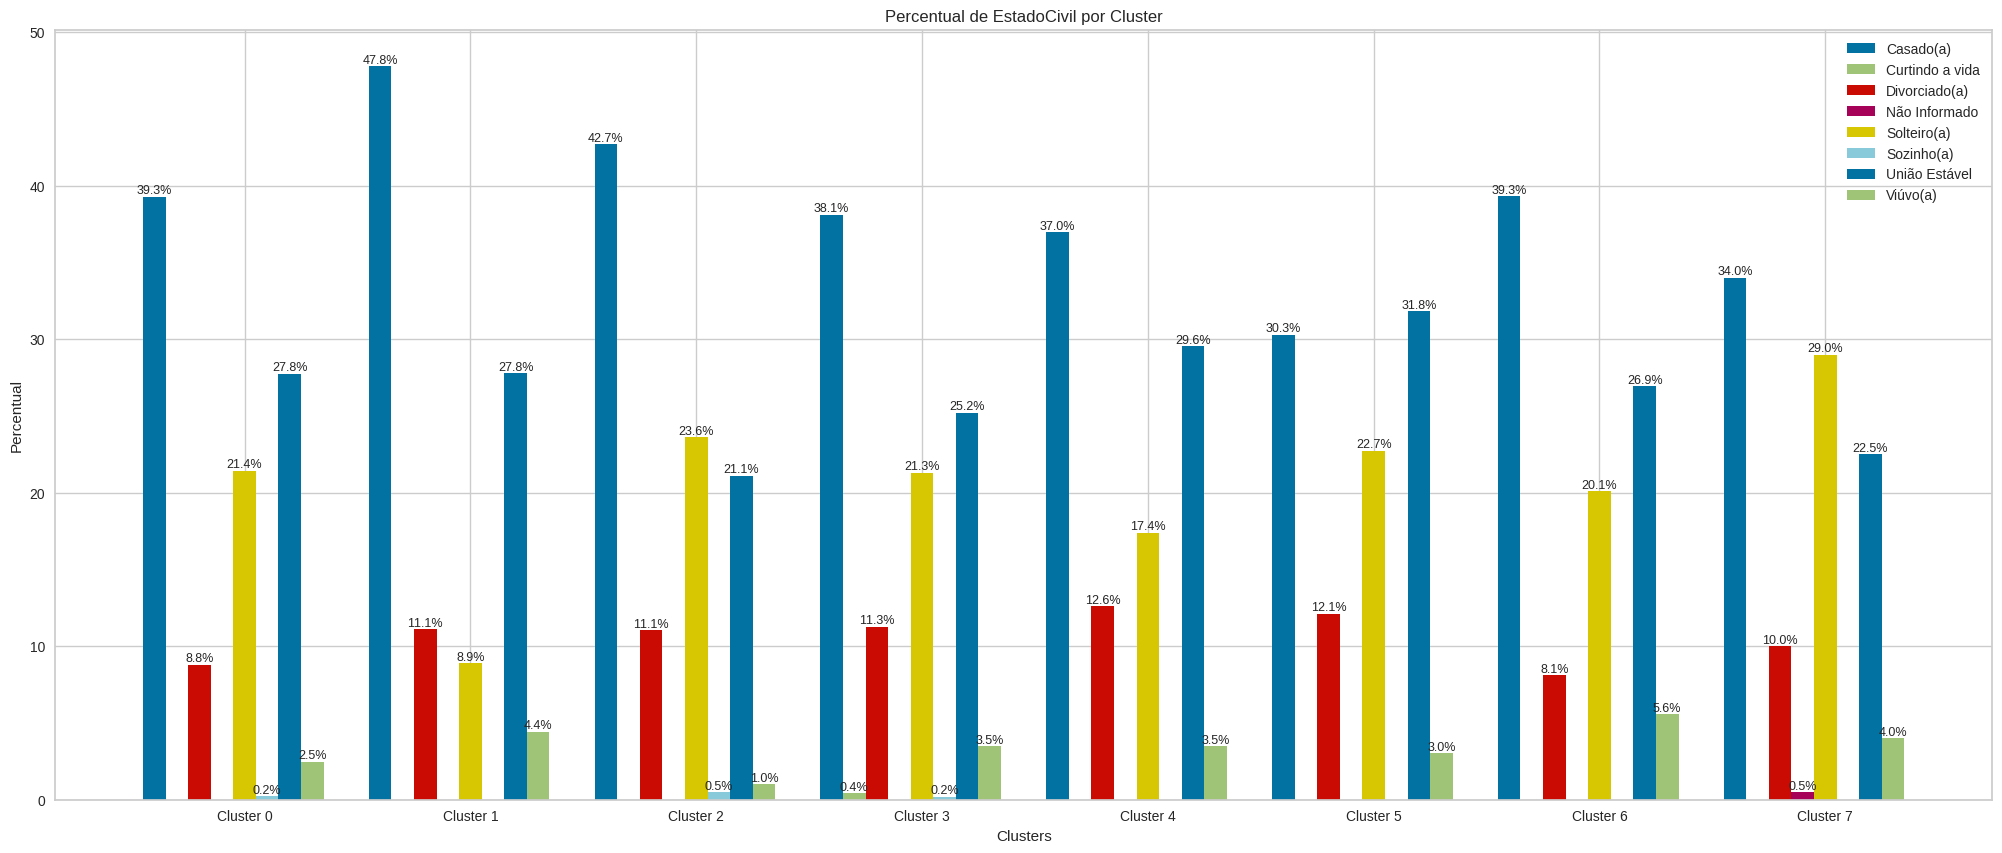

In [ ]:
# Variáveis a serem analisadas:
vars1 = list(cat_attributes.columns).copy()

vars_categoricas = vars1

for var in vars_categoricas:
  percentuais_por_cluster = df_publico.groupby('Cluster')[var].value_counts(normalize=True).mul(100).unstack().reset_index().values

  # Extrair os clusters e os percentuais de satisfação
  clusters = percentuais_por_cluster[:, 0]
  percentuais = percentuais_por_cluster[:, 1:]

  # Largura da barra
  bar_width = 0.1

  # Coordenadas das barras
  x = np.arange(len(clusters))

  # Plotar o gráfico de barras
  plt.figure(figsize=(25, 10))

  unicos = sorted(df_publico[var].unique())
  for i in range(len(percentuais[0])):
      j = unicos[i]
      plt.bar(x + i * bar_width, percentuais[:, i], bar_width, label=f'{j}')
      for j, val in enumerate(percentuais[:, i]):
          plt.text(x[j] + i * bar_width, val, '{:.1f}%'.format(val), ha='center', va='bottom', fontsize=9);

  # Adicionar rótulos e título
  plt.xlabel('Clusters');
  plt.ylabel('Percentual');
  plt.title(f'Percentual de {var} por Cluster');
  plt.xticks(x + bar_width * len(percentuais[0]) / 2, [f'Cluster {int(cluster)}' for cluster in clusters]);
  plt.legend(loc='best');

  # Mostrar o gráfico
  plt.show();

Insights gerados:

* Nível de Educação:
  * Nos clusters 4, 5 e 7 não há clientes com Ensino Médio;
  * Nos demais clusters, há presença de todos os níveis de educação, sendo a Graduação o nível predominante em todos eles;
  * O cluster 5 possui a maior concentração percentual de Doutores.

* Estado Civil:
  * O cluster 1 possui a maior concentração percentual de clientes casados;
  * O cluster 7 apresenta o maior percentual de clientes solteiros;
  * Os clientes cujo estado civil não foi informado estão inseridos no cluster 7.


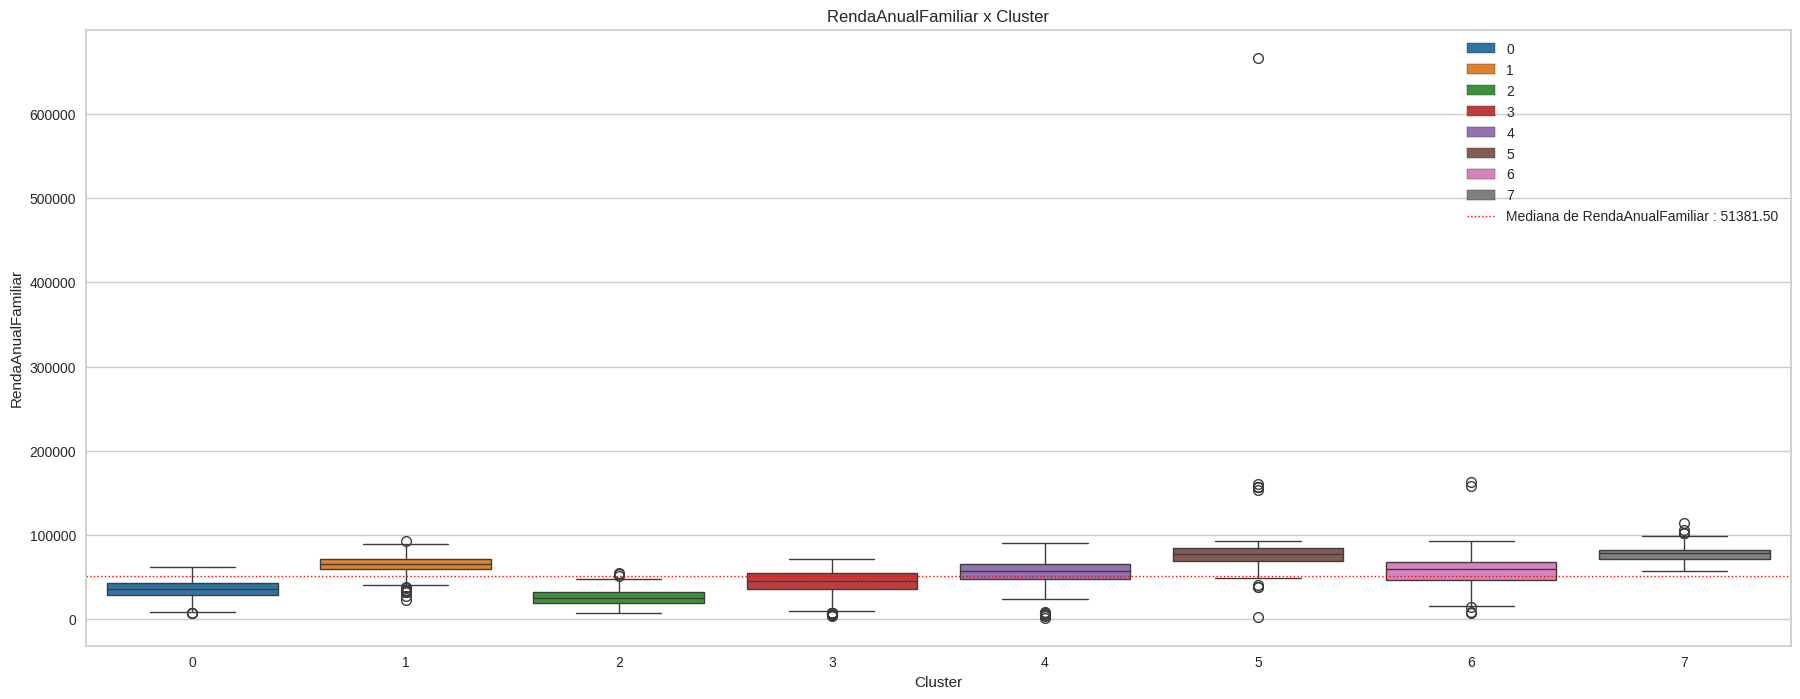

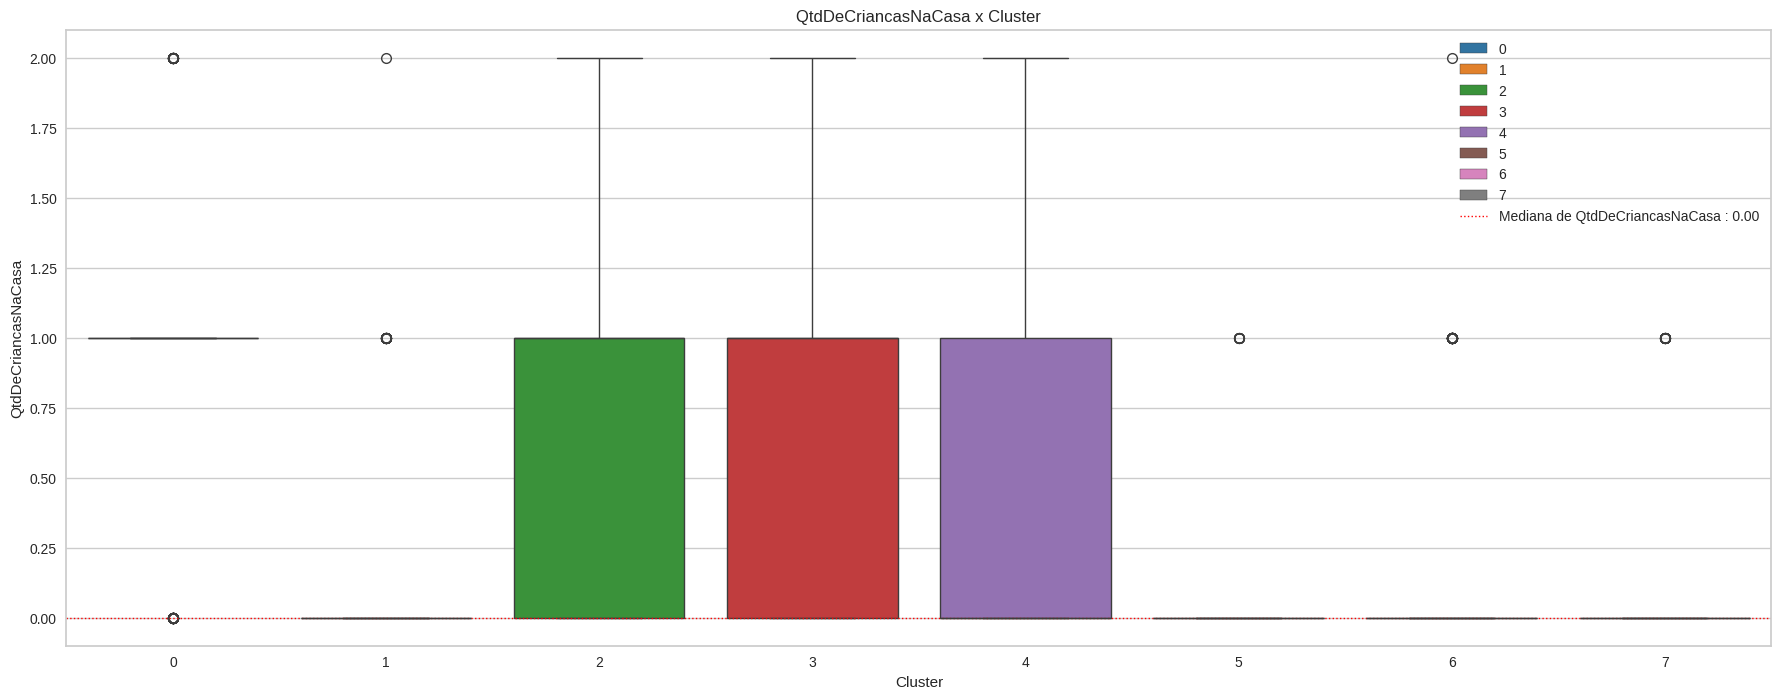

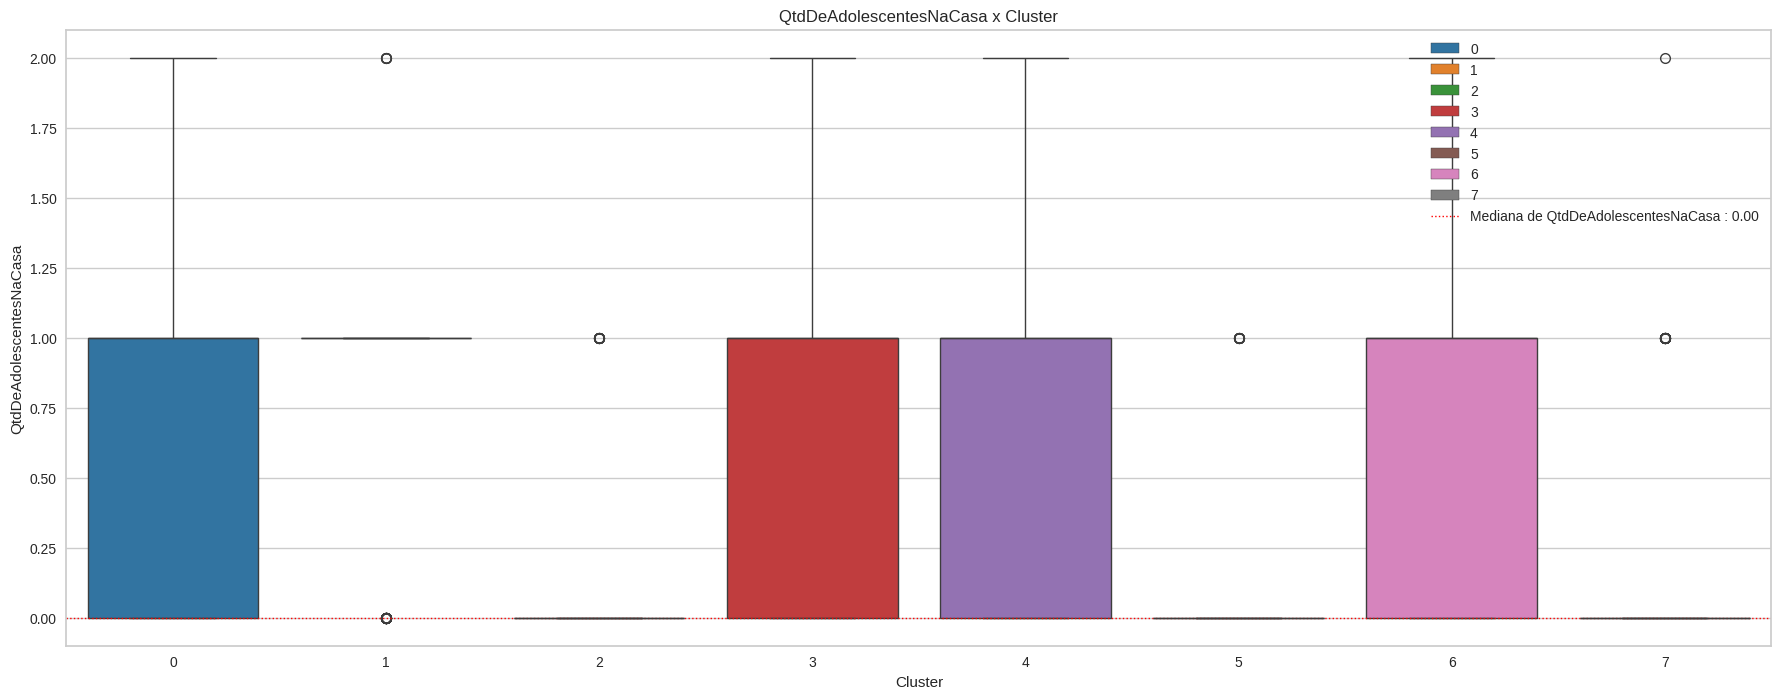

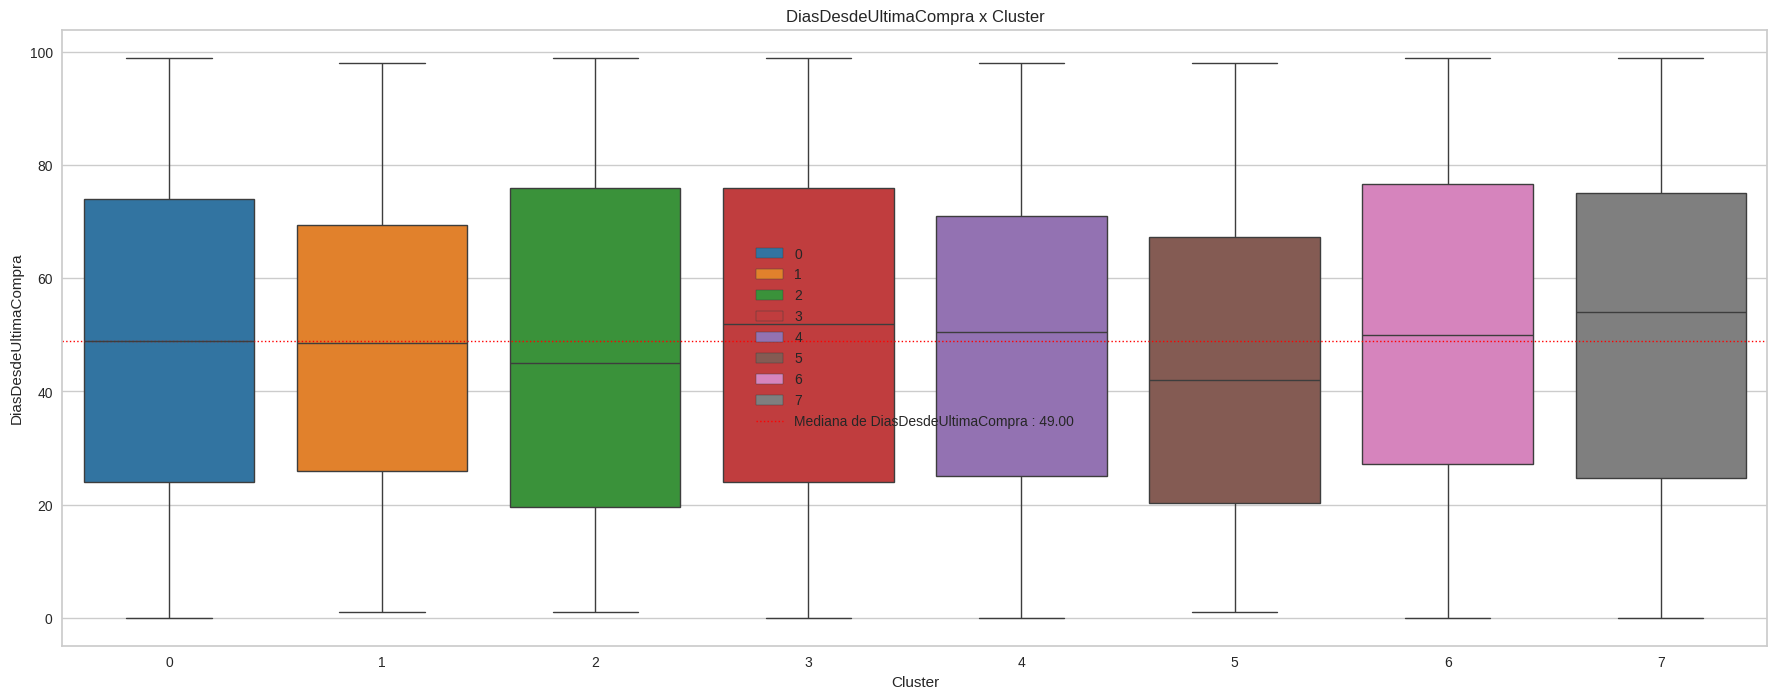

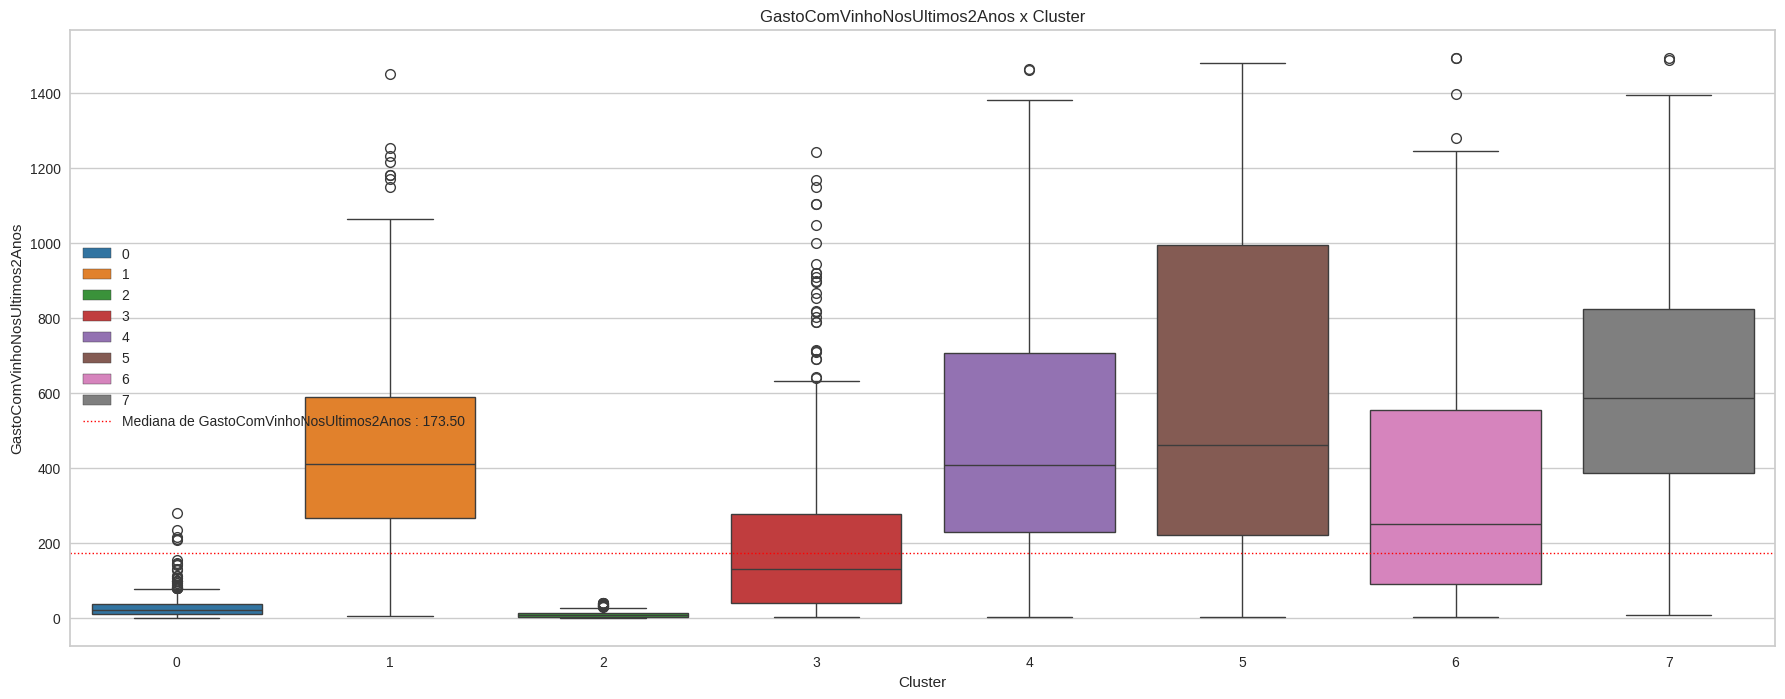

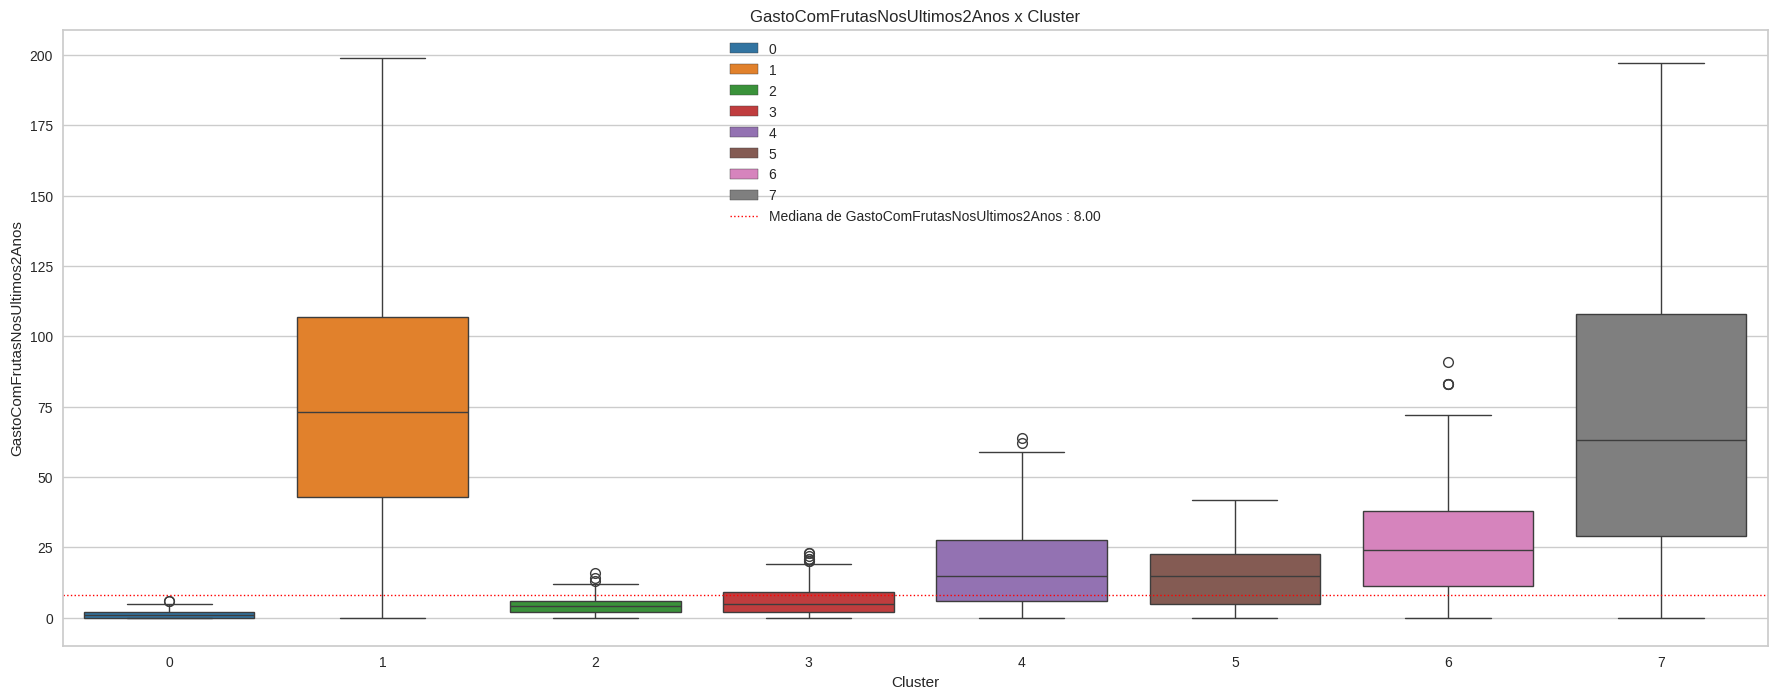

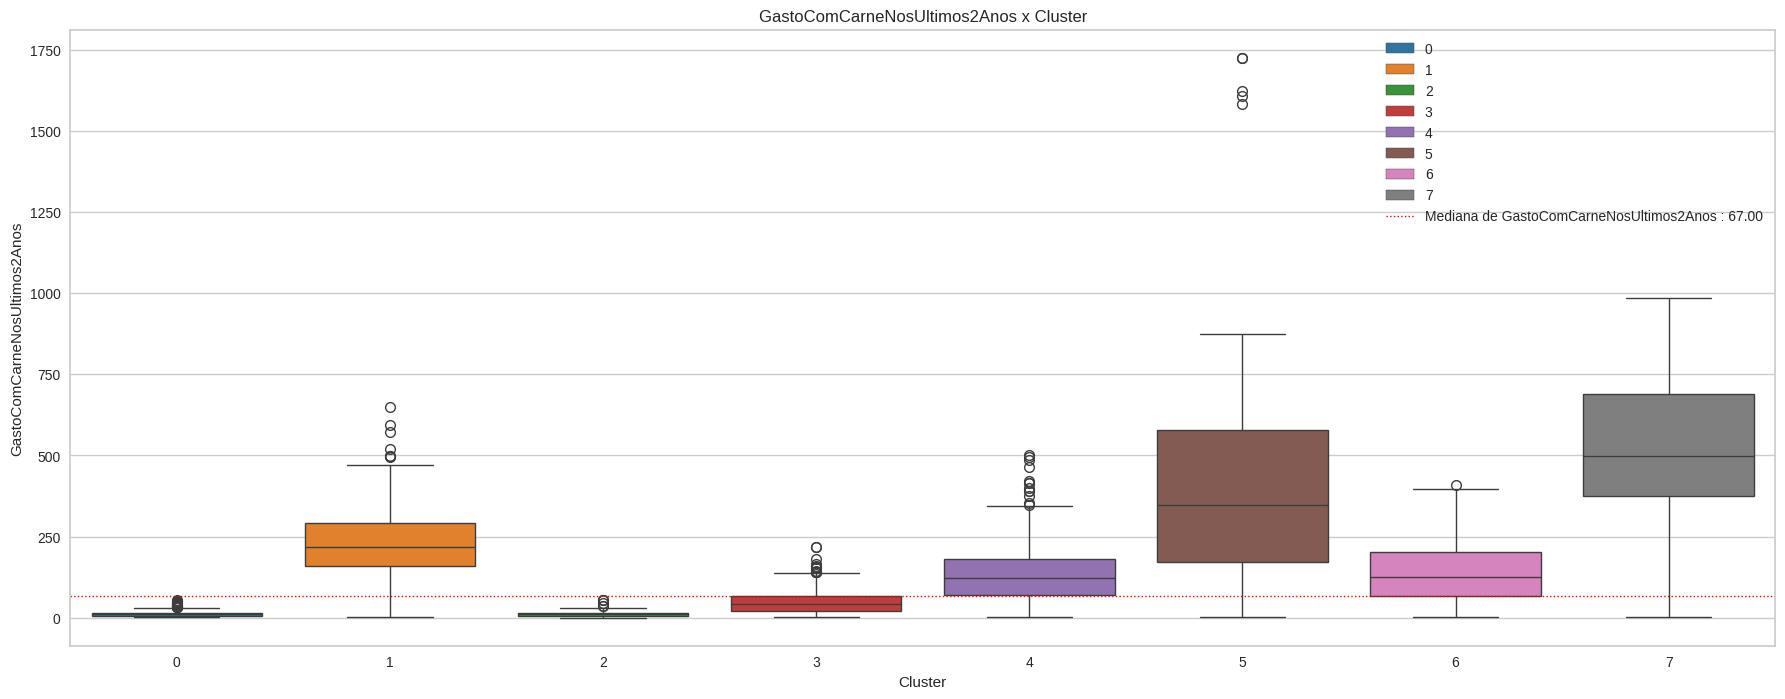

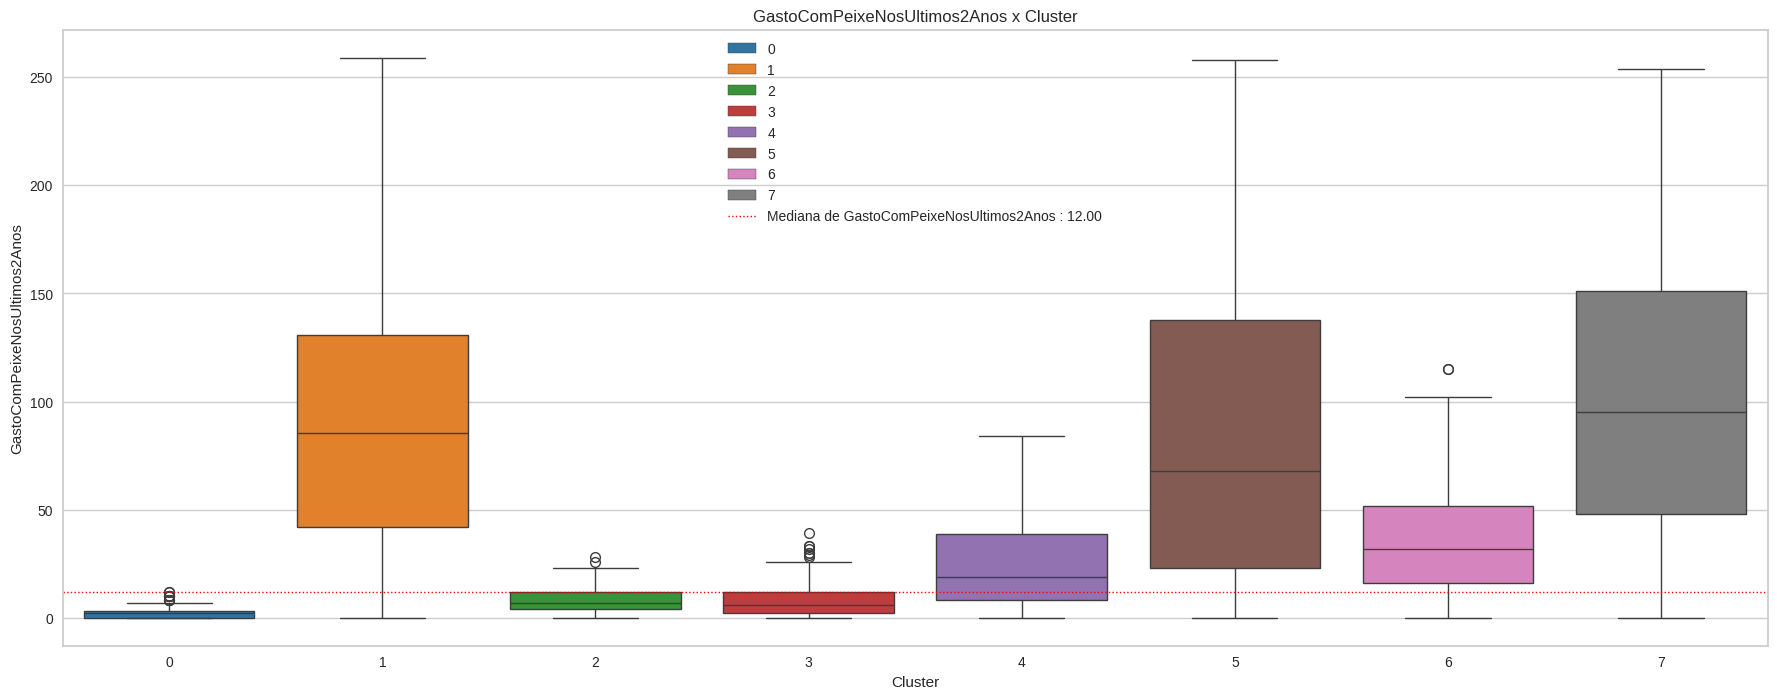

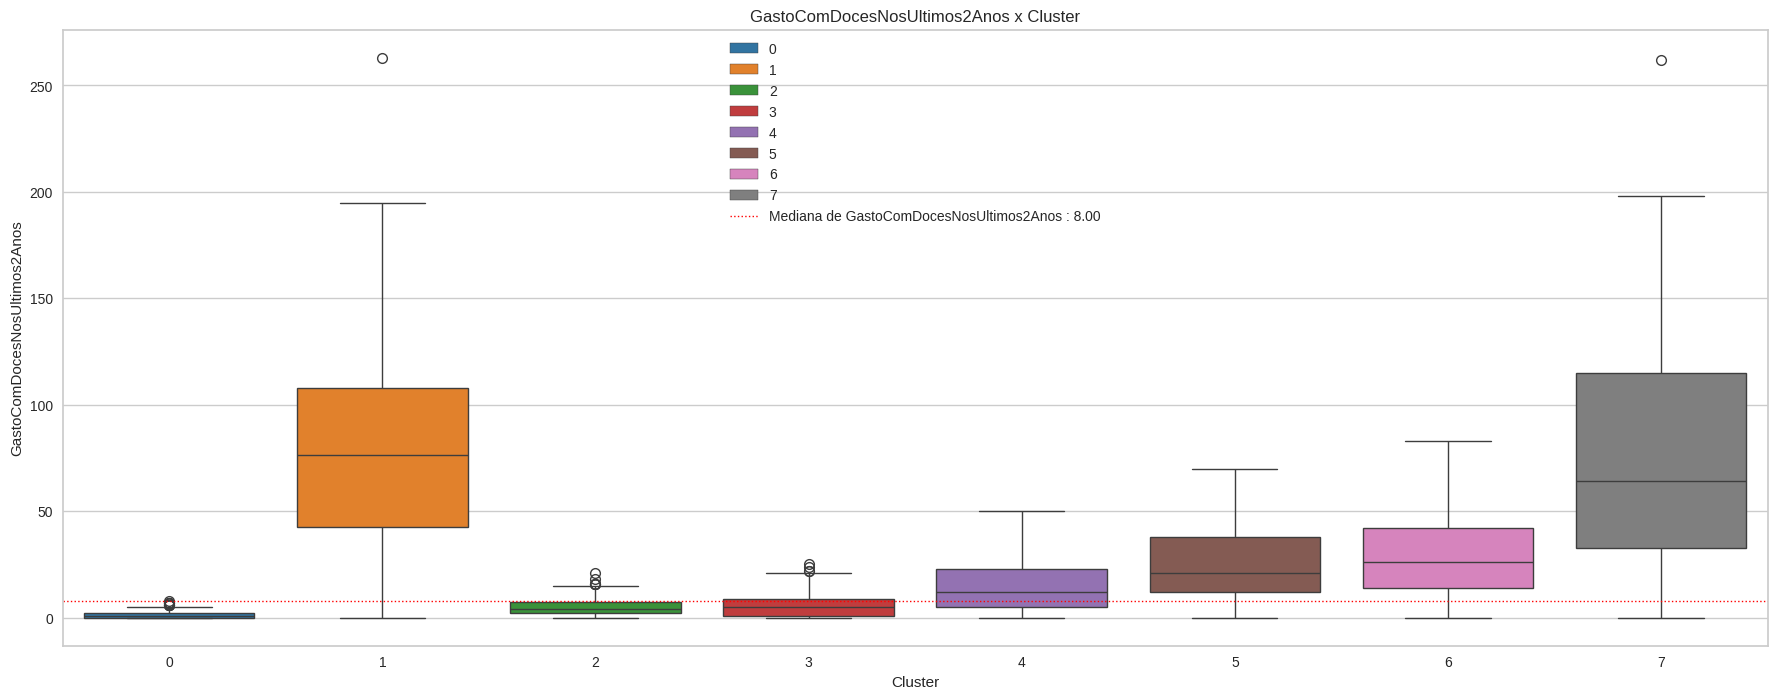

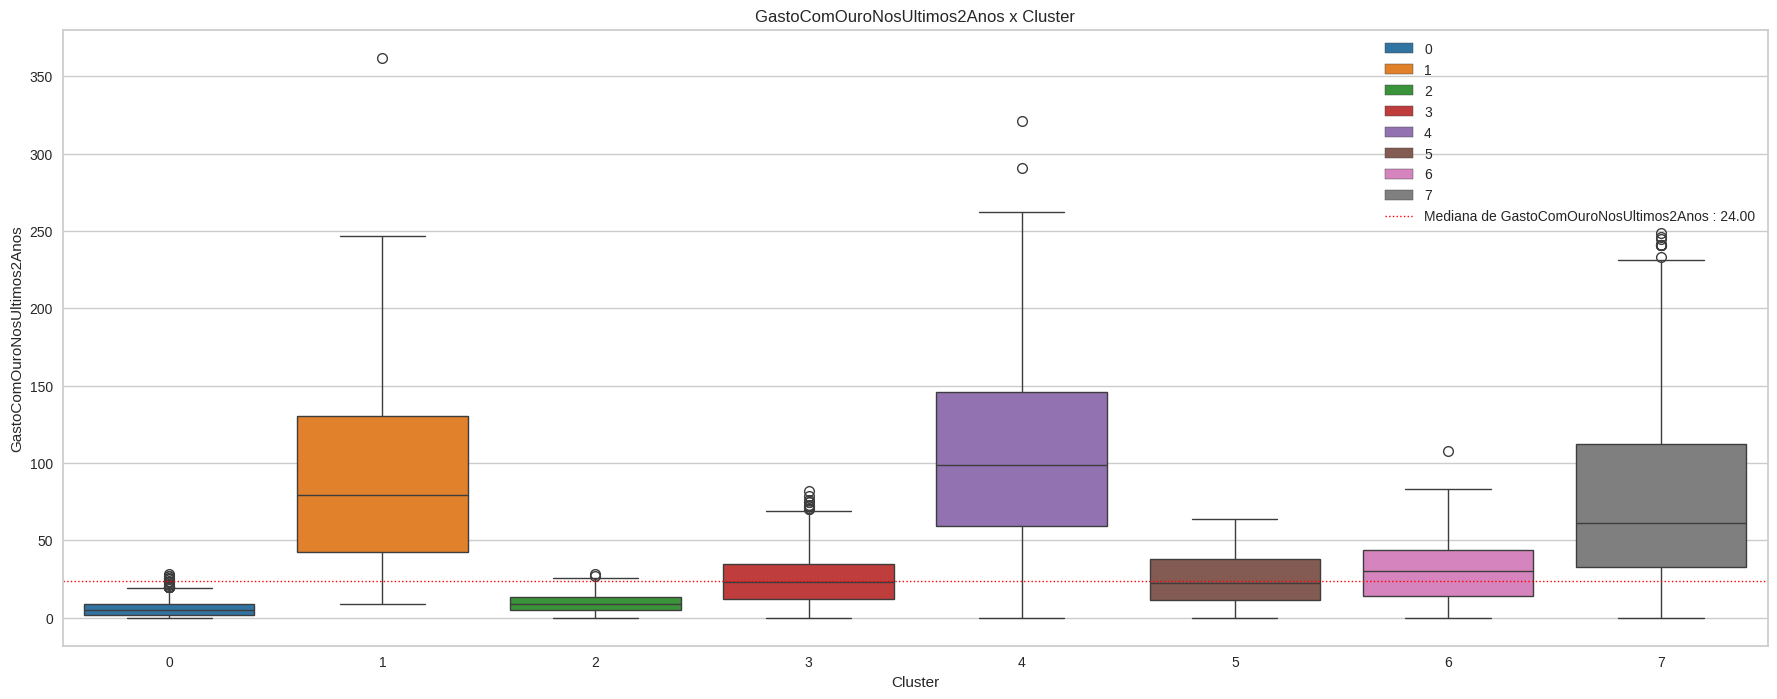

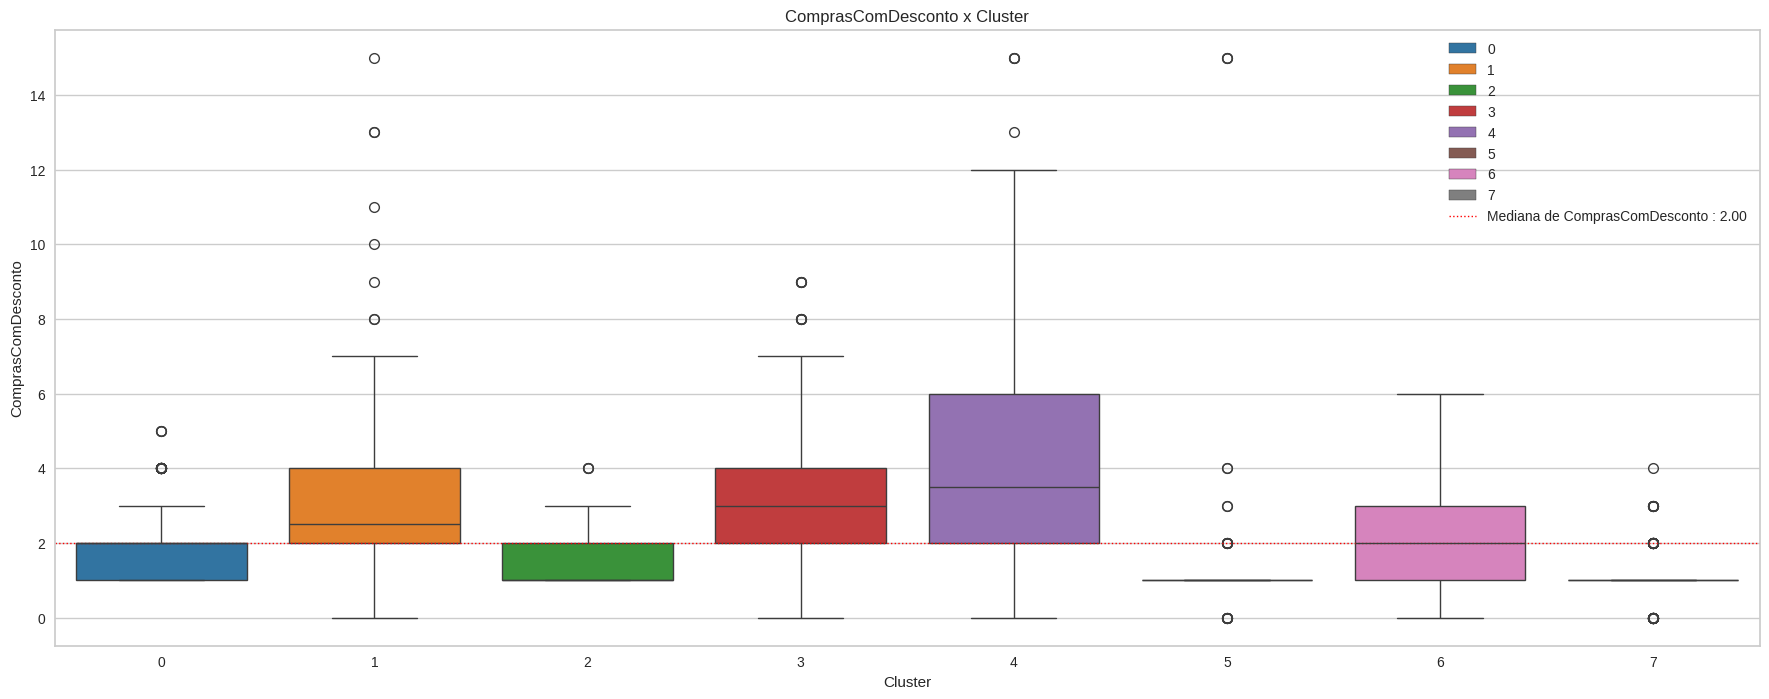

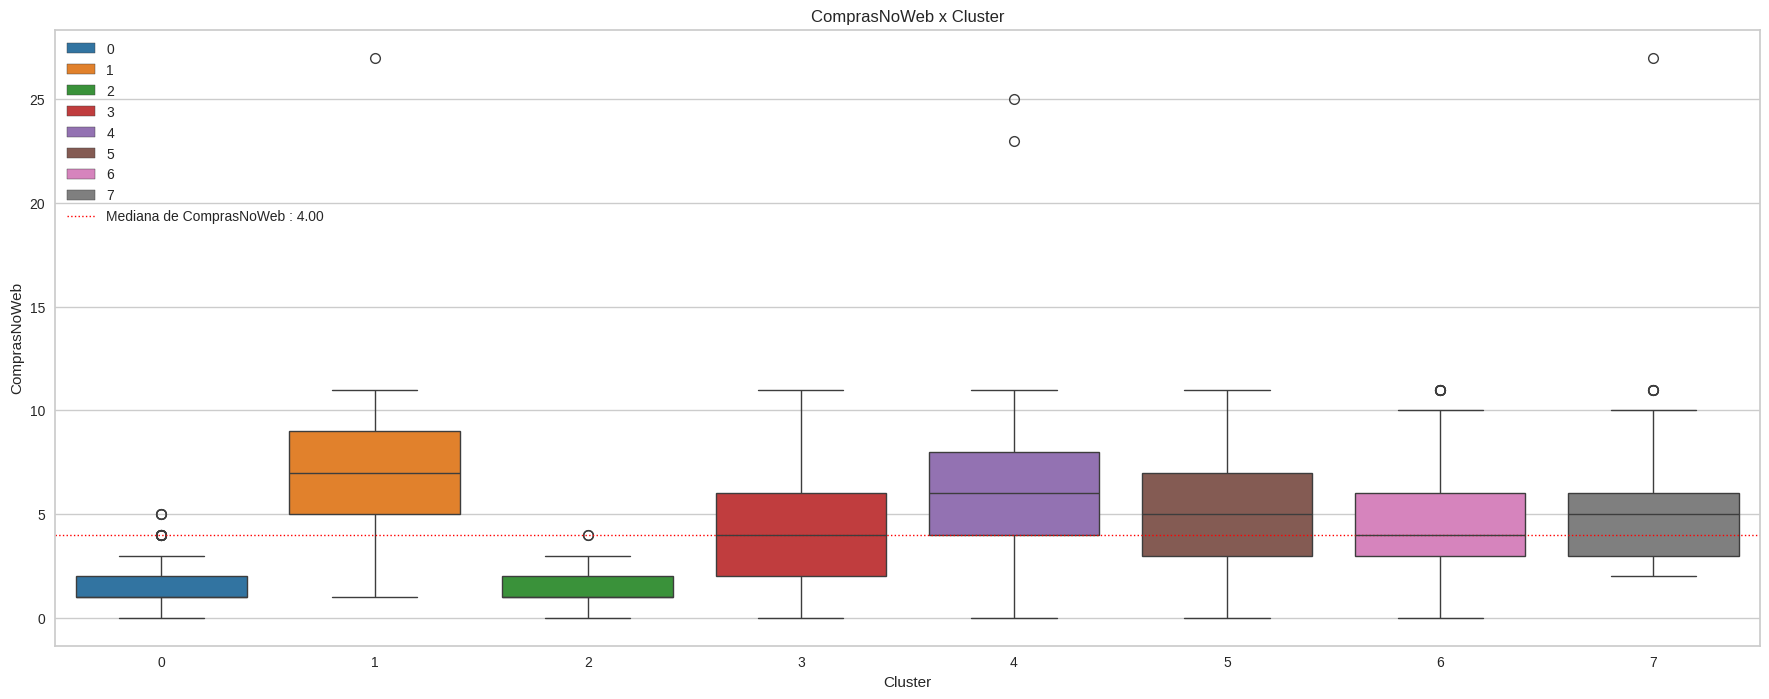

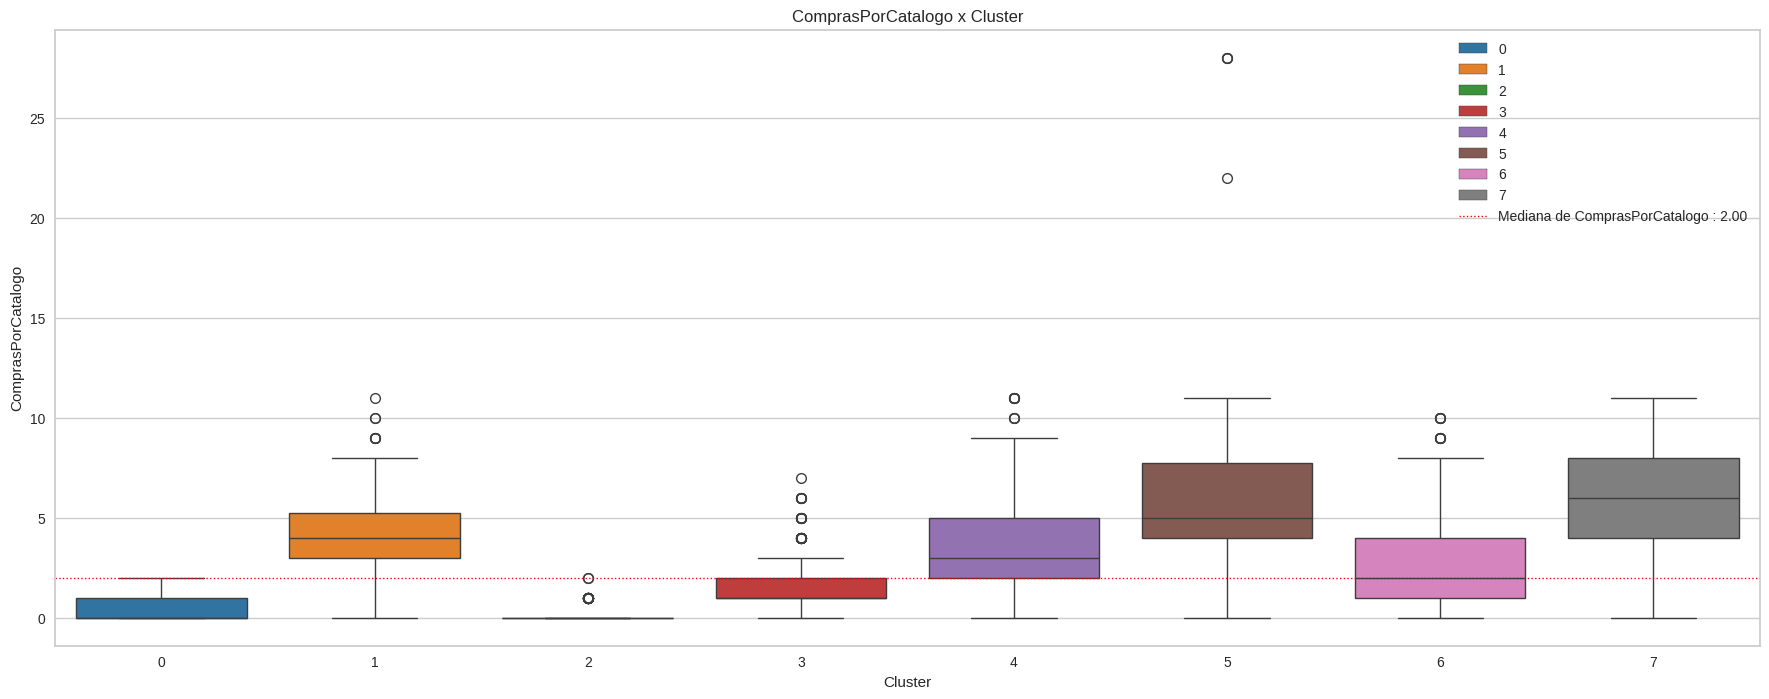

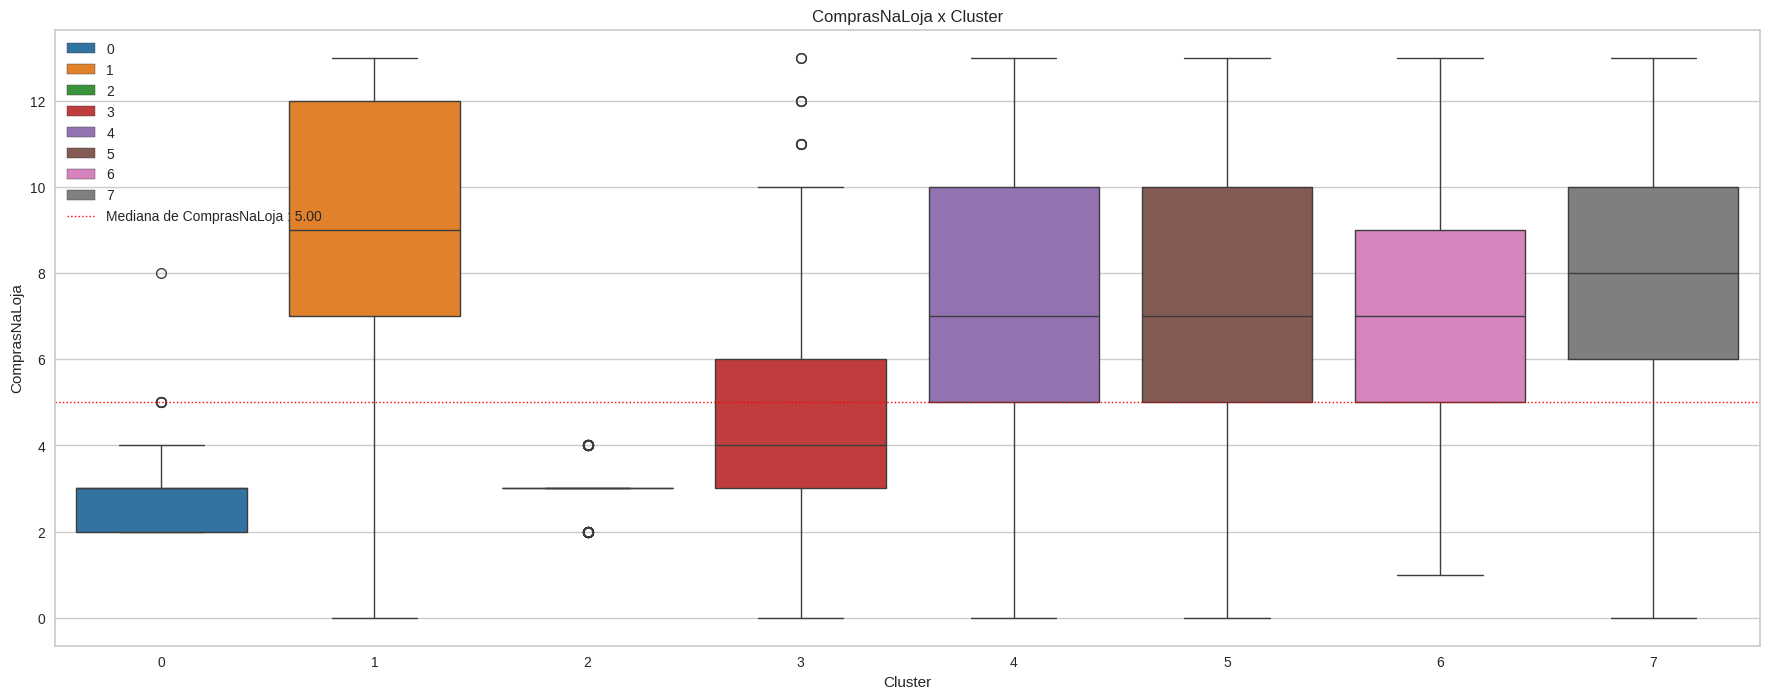

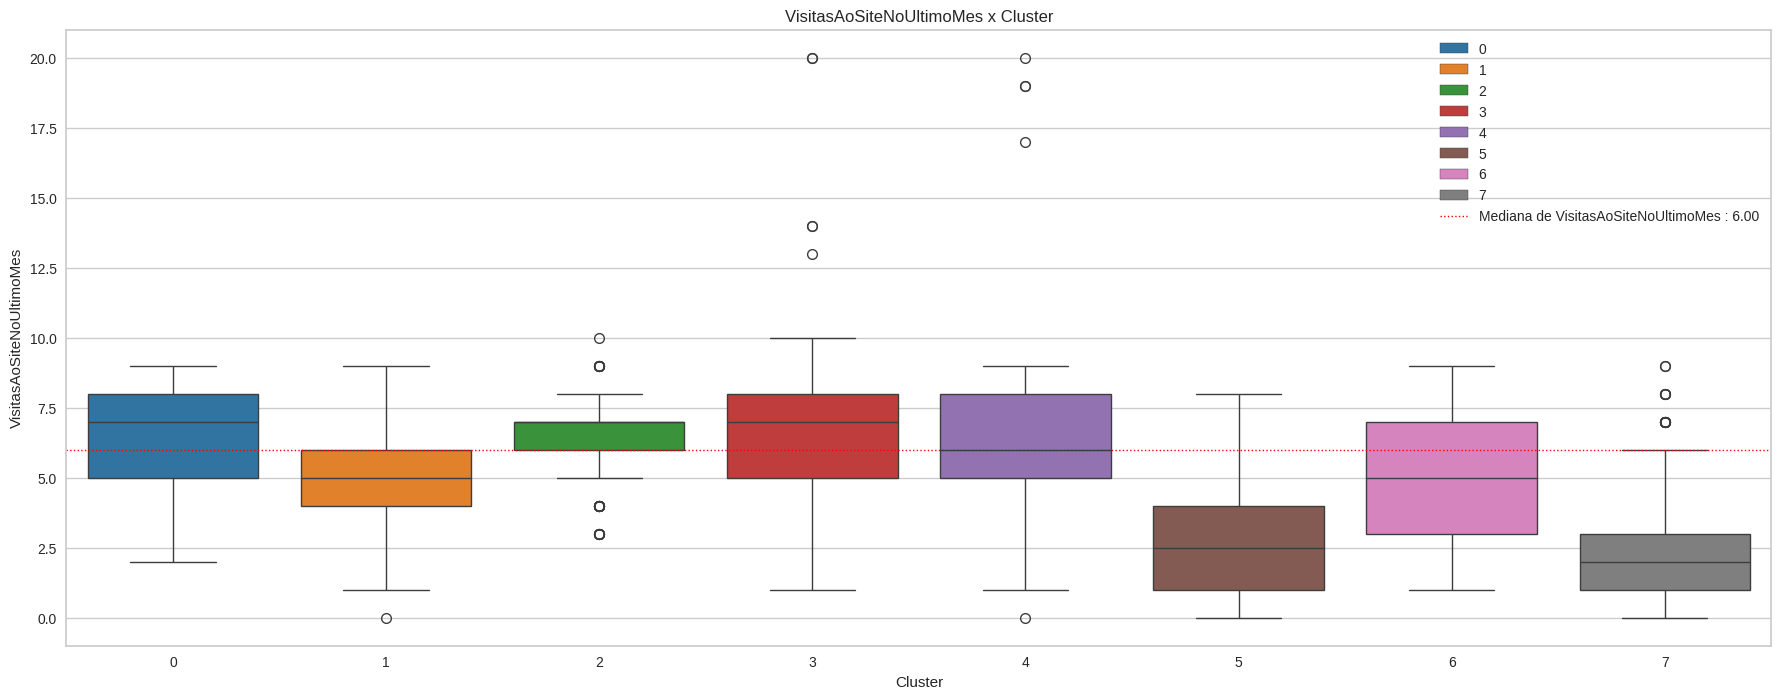

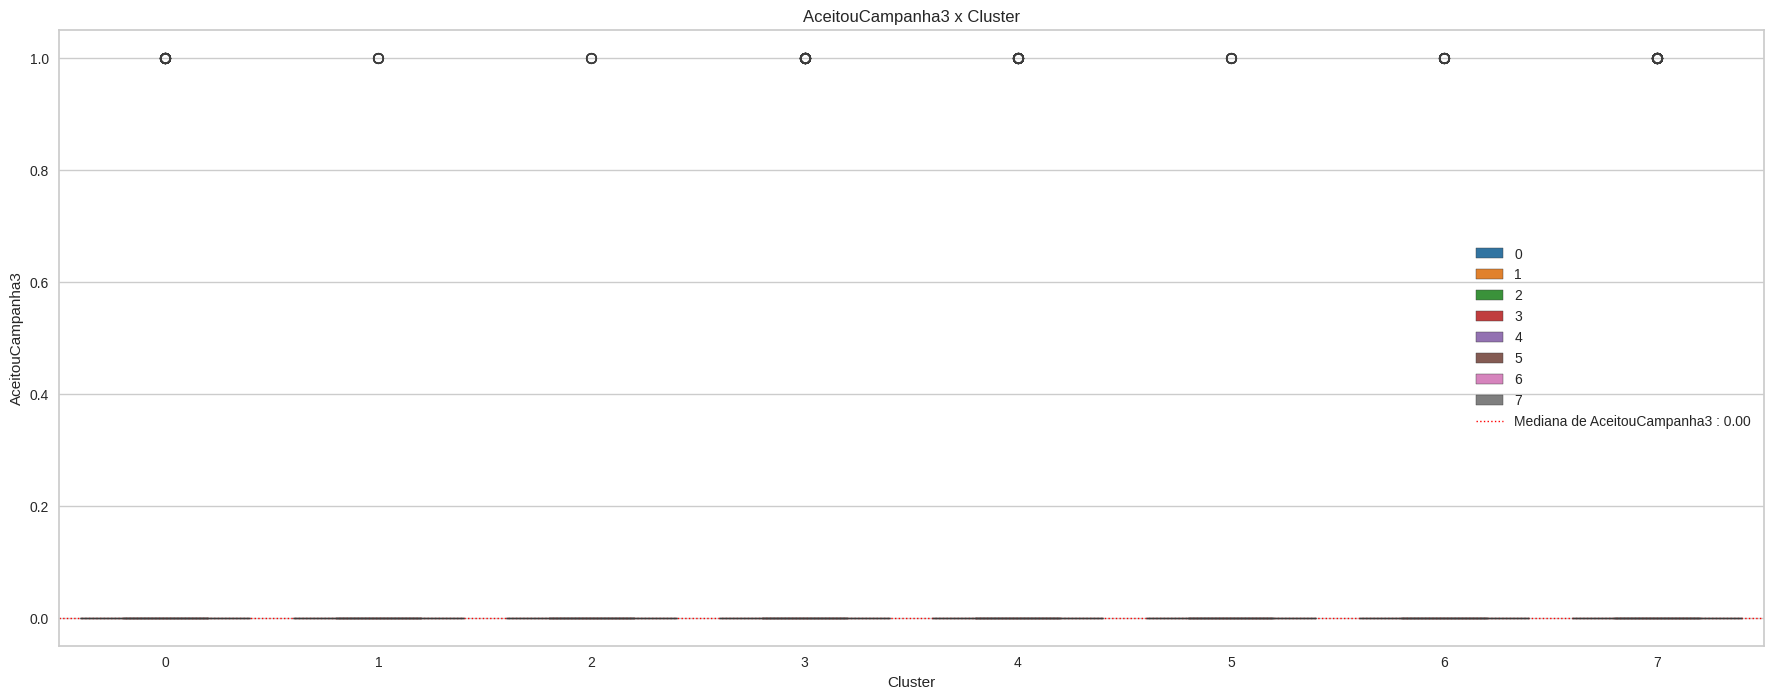

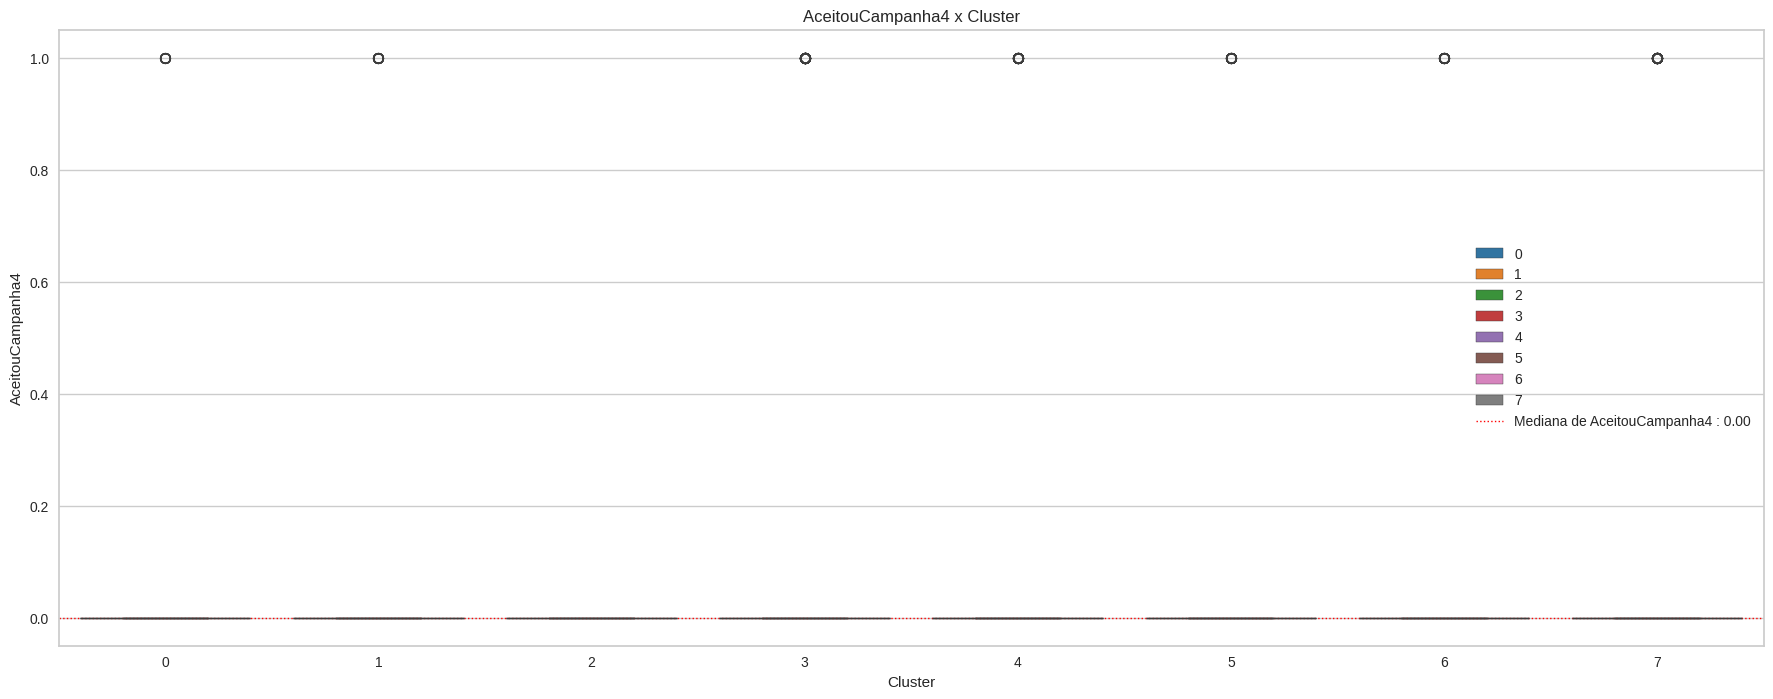

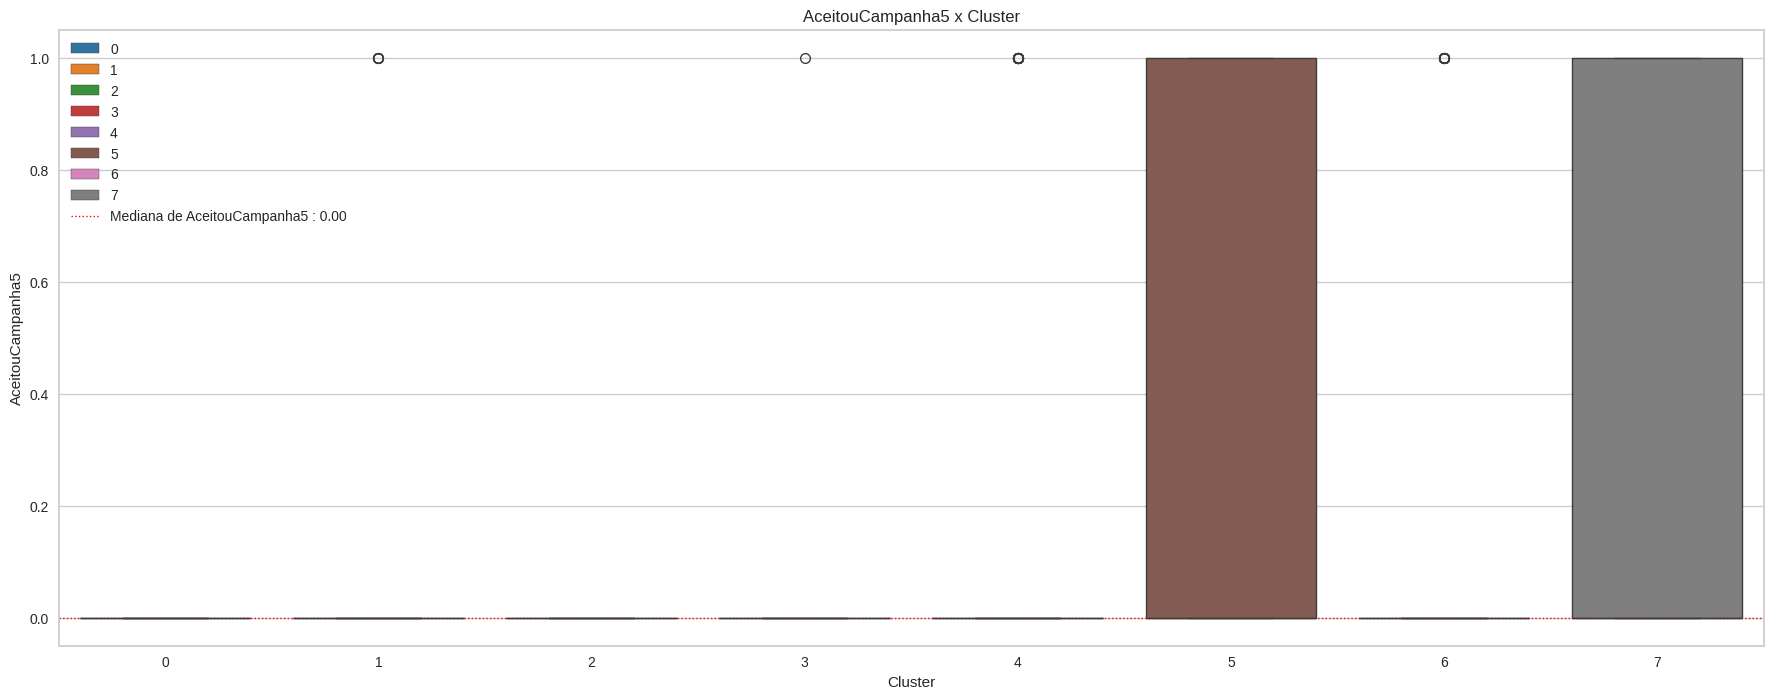

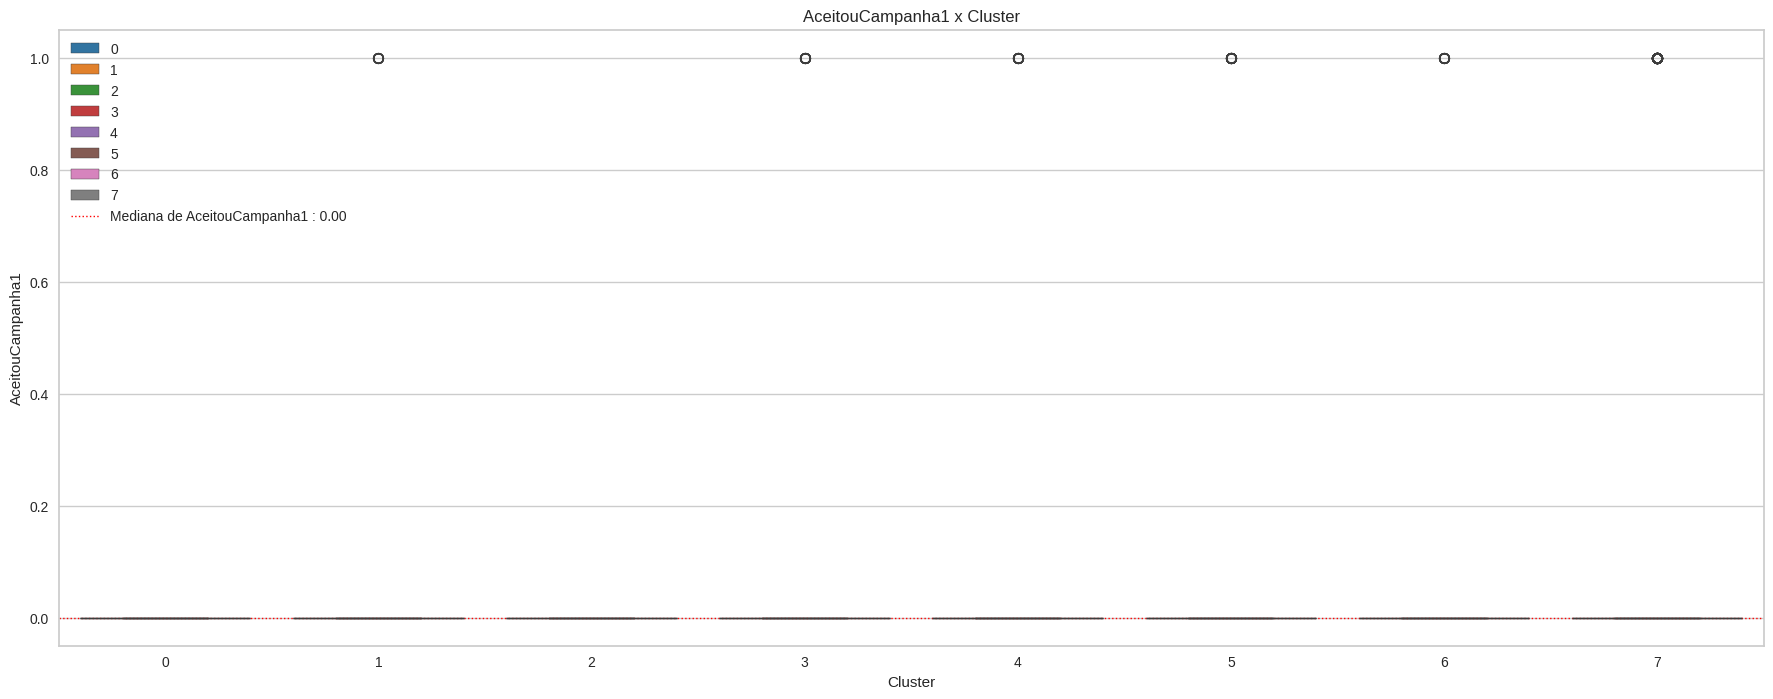

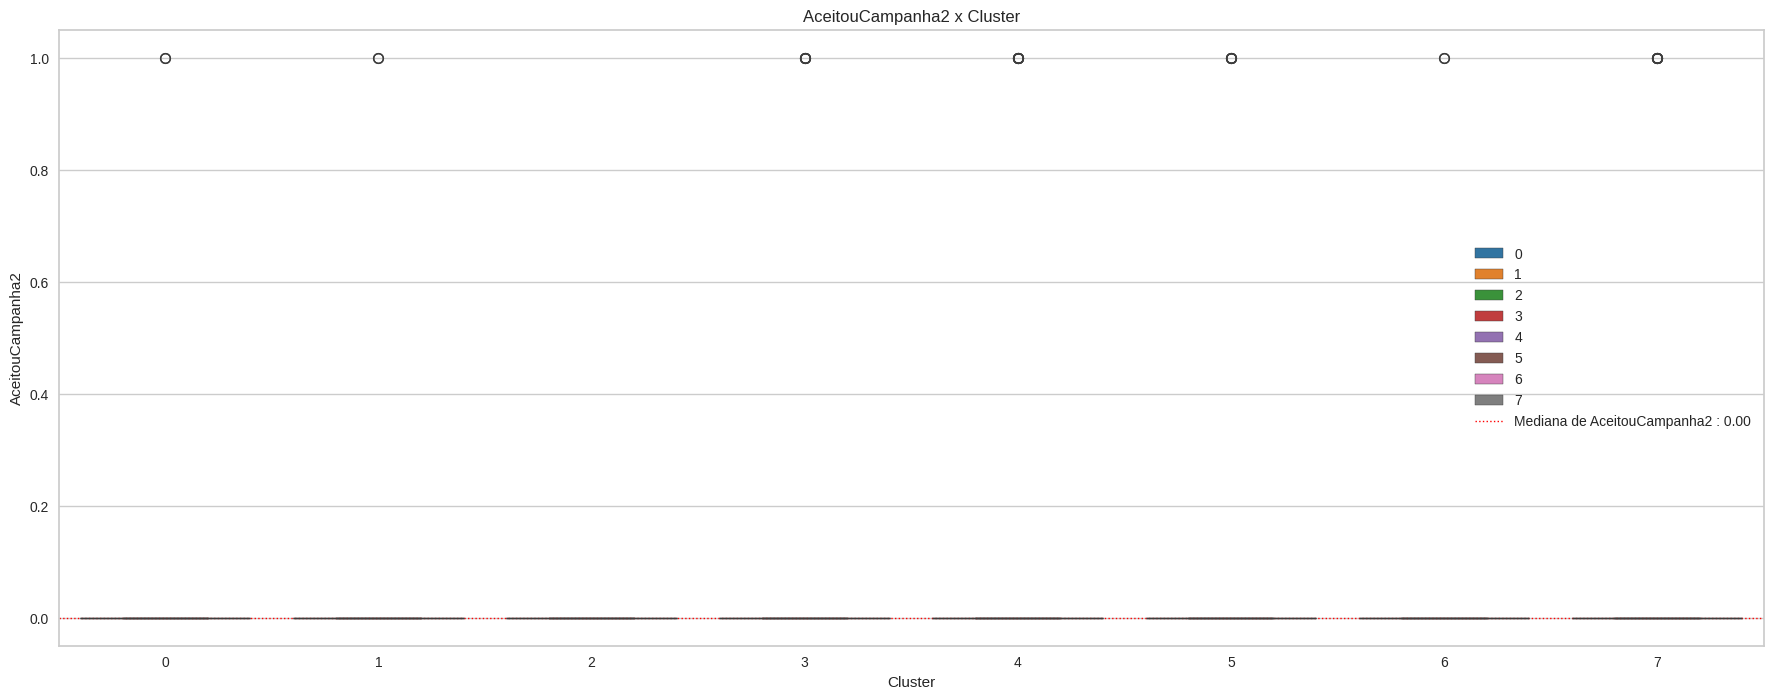

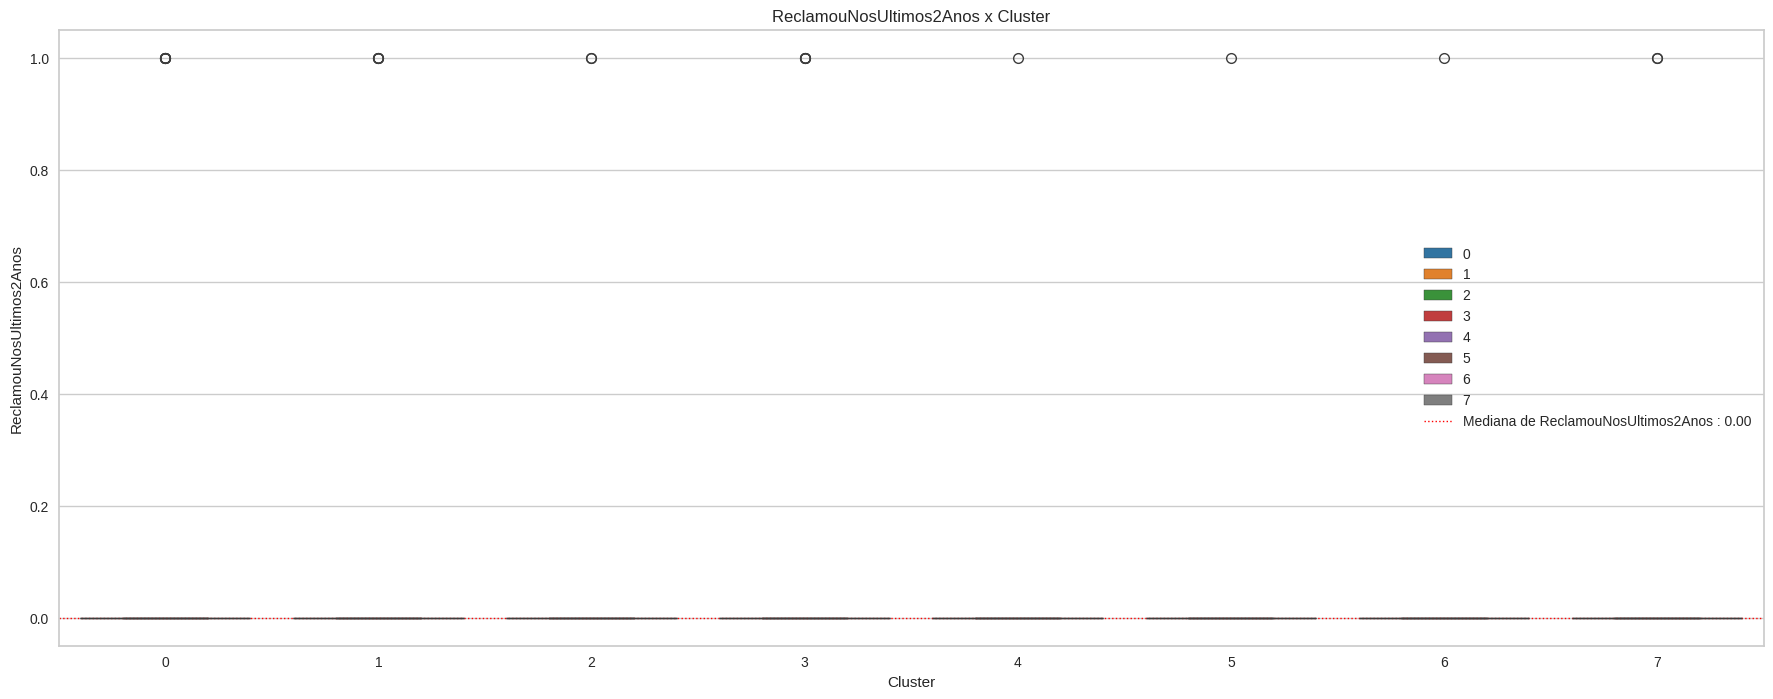

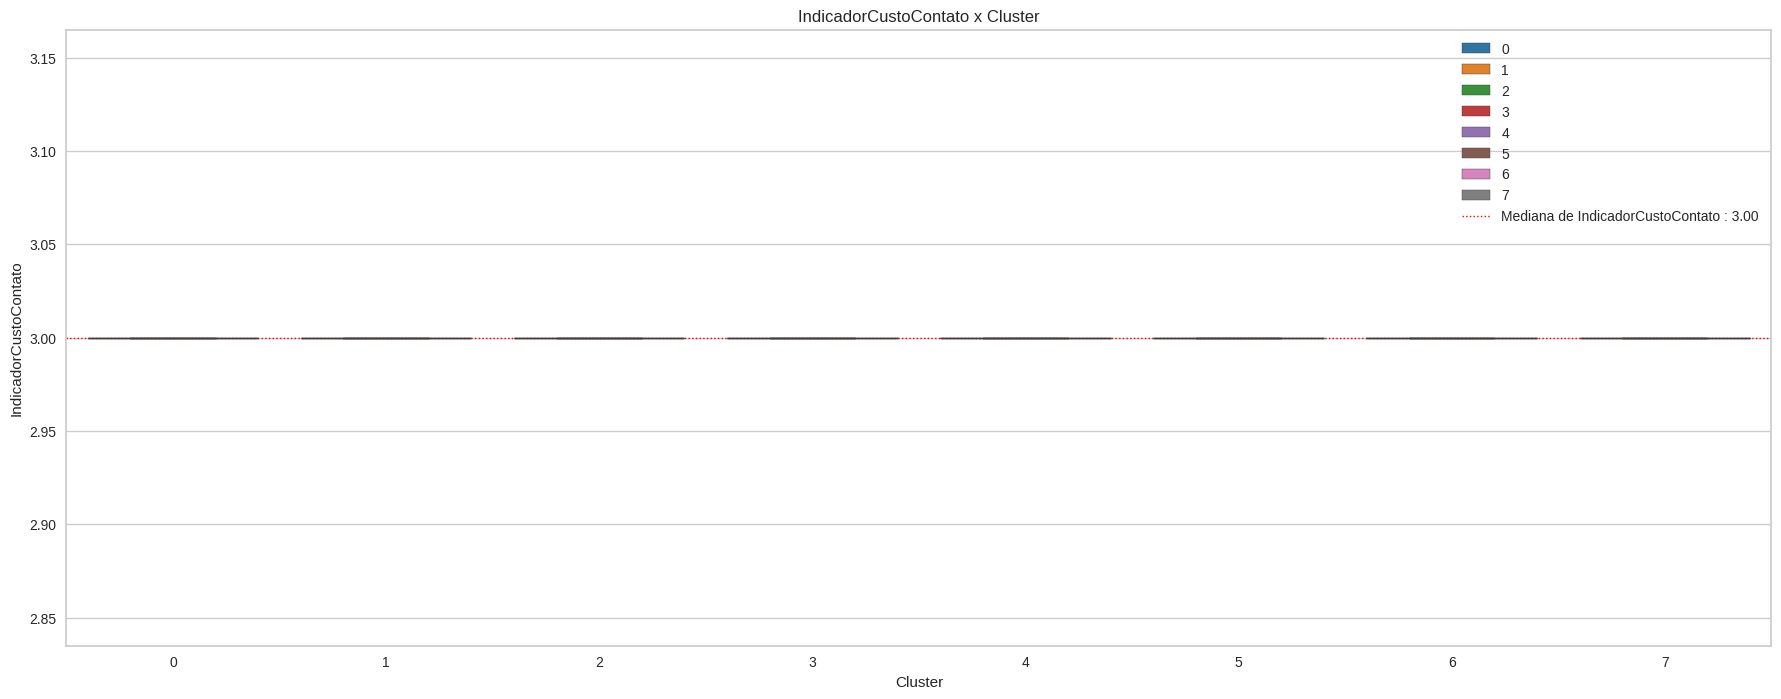

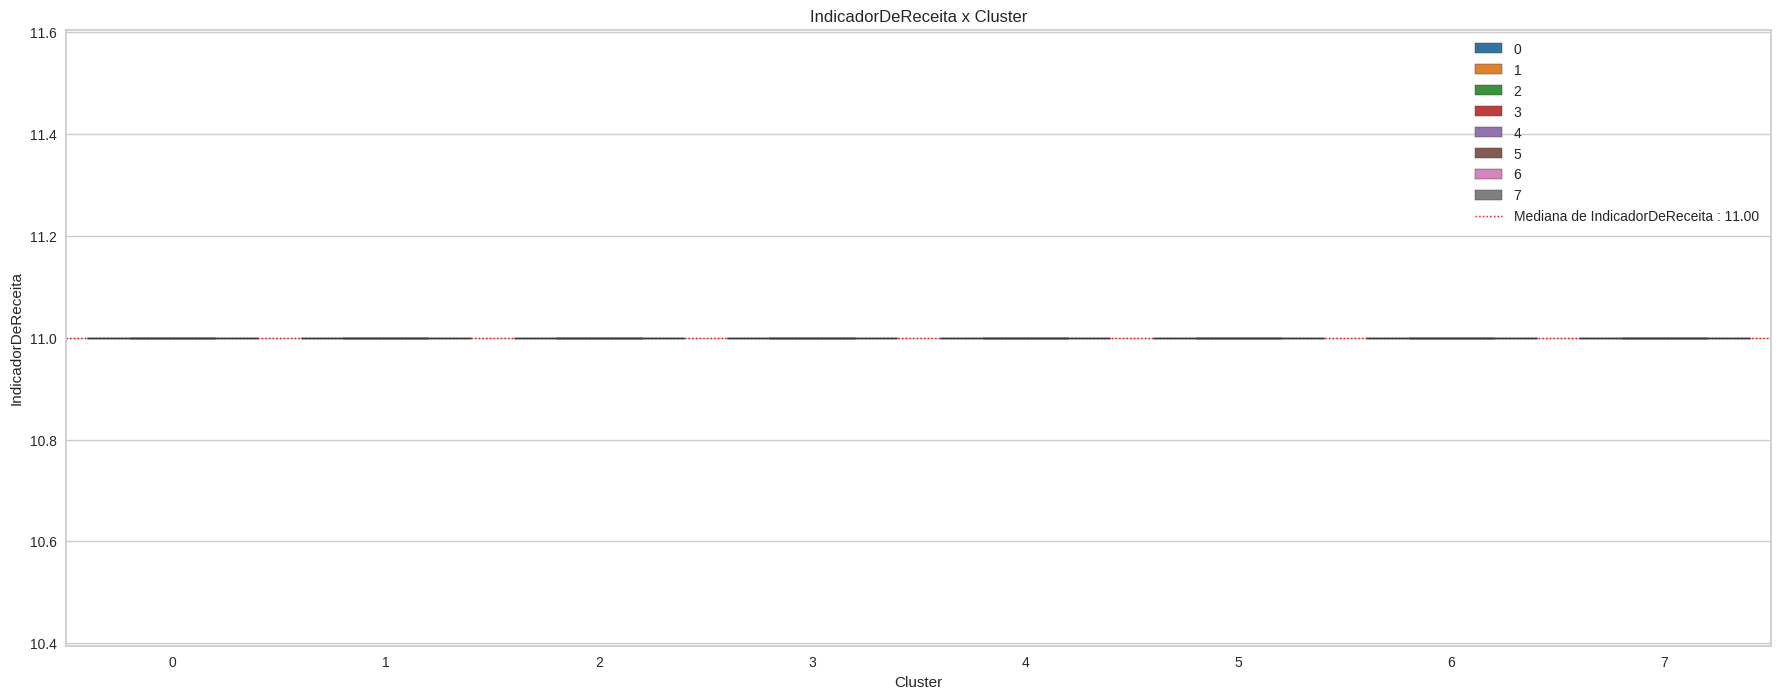

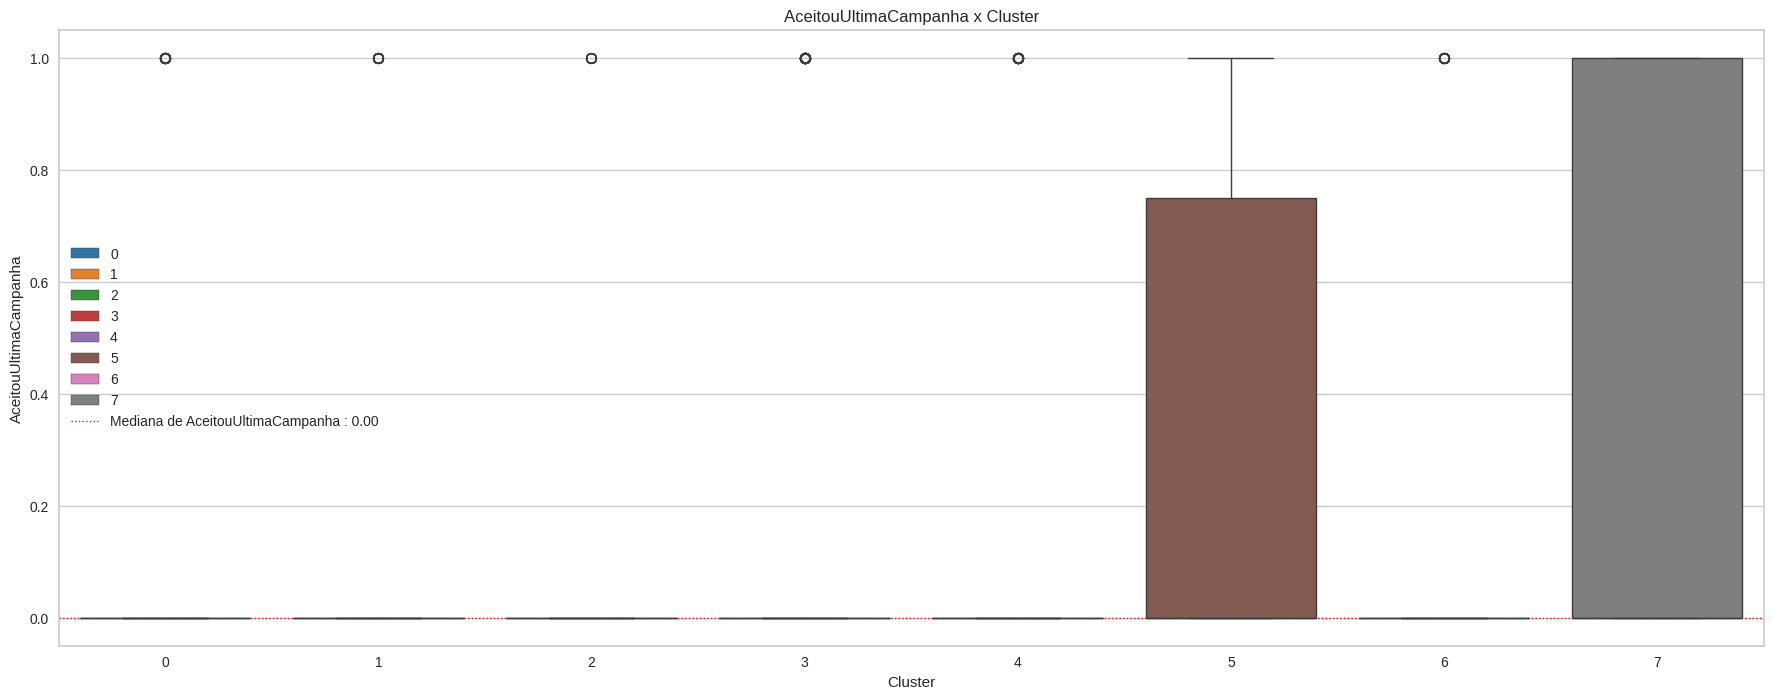

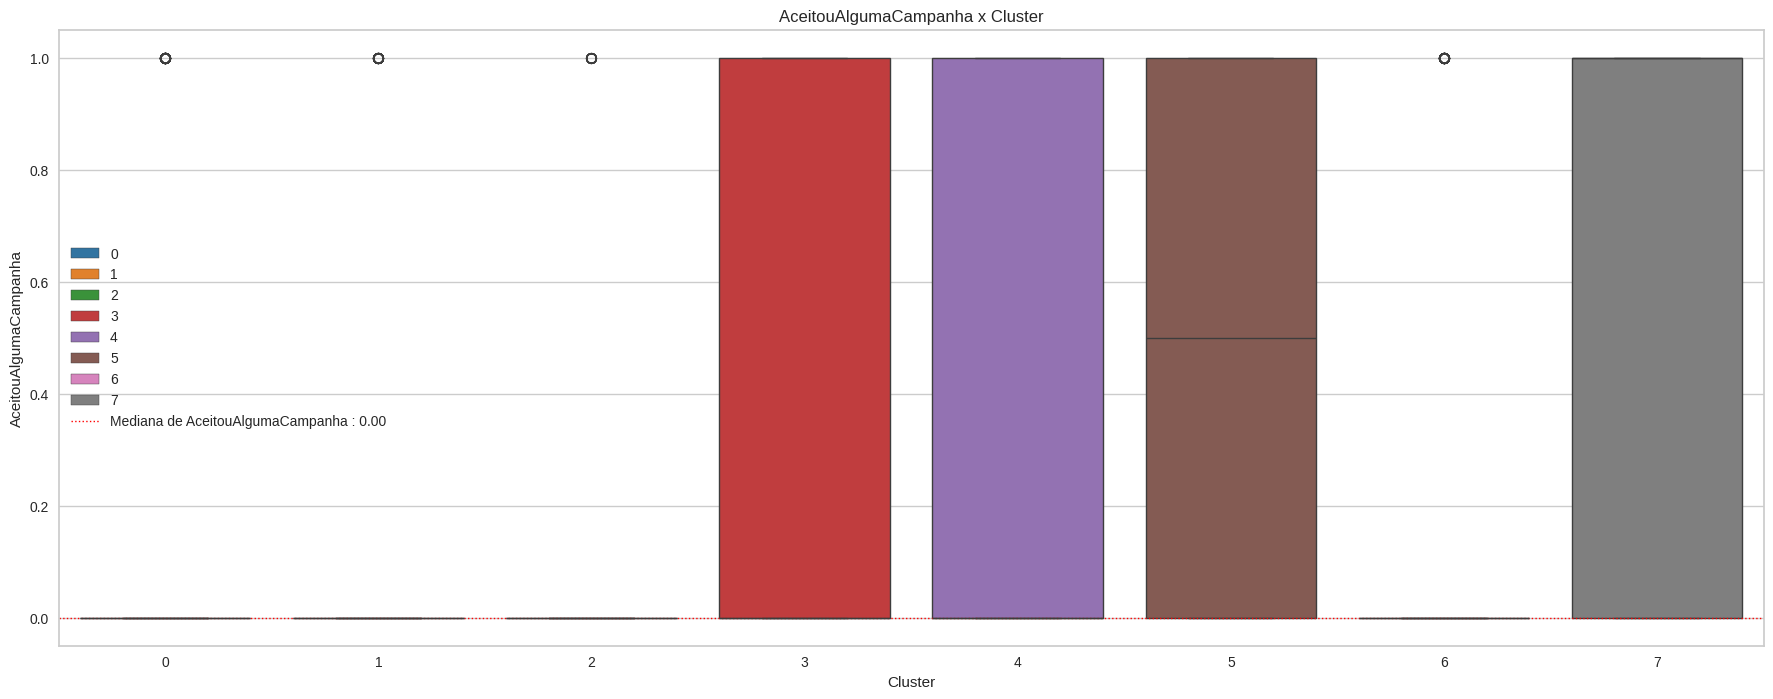

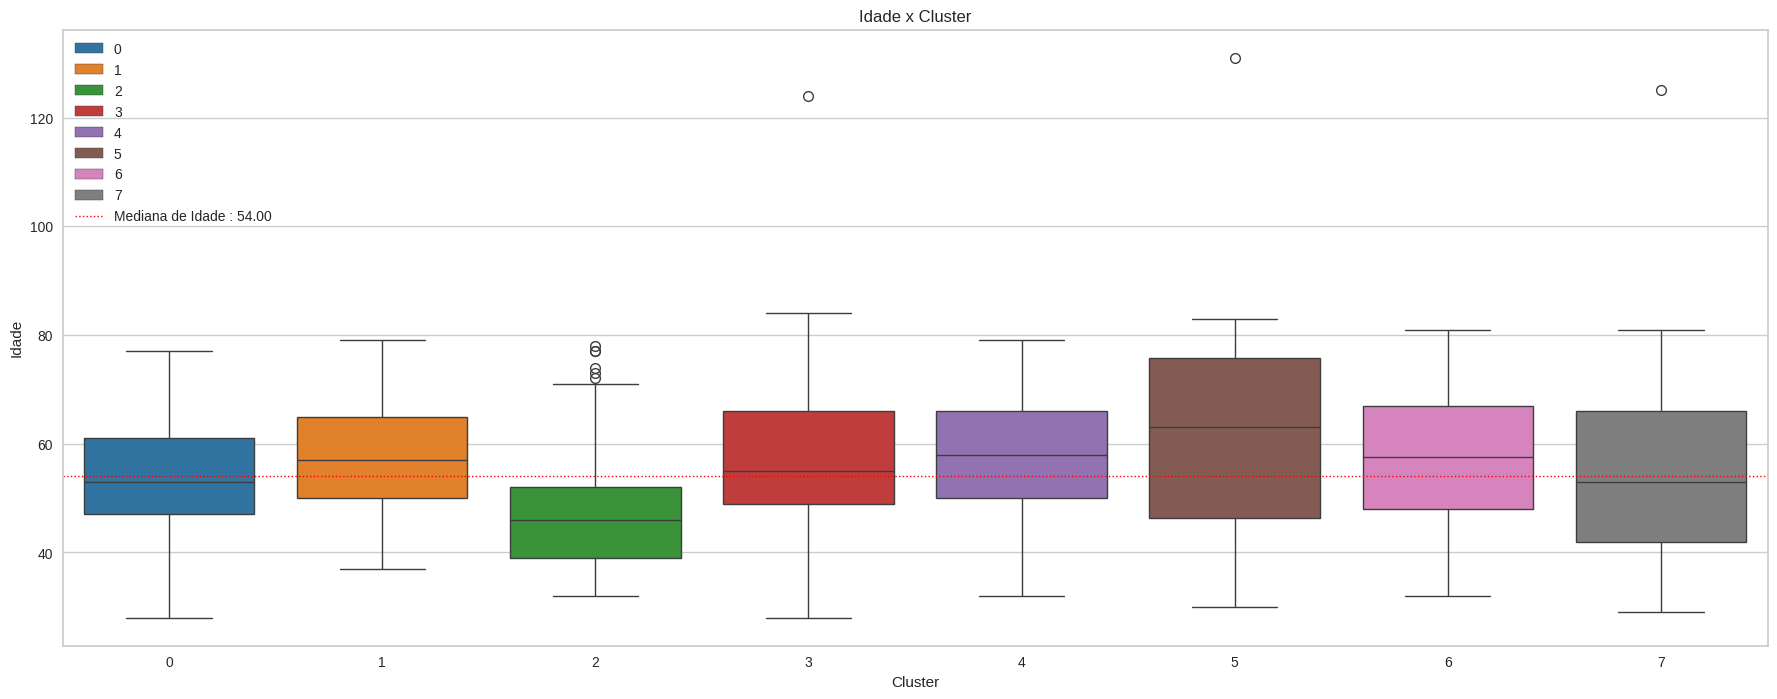

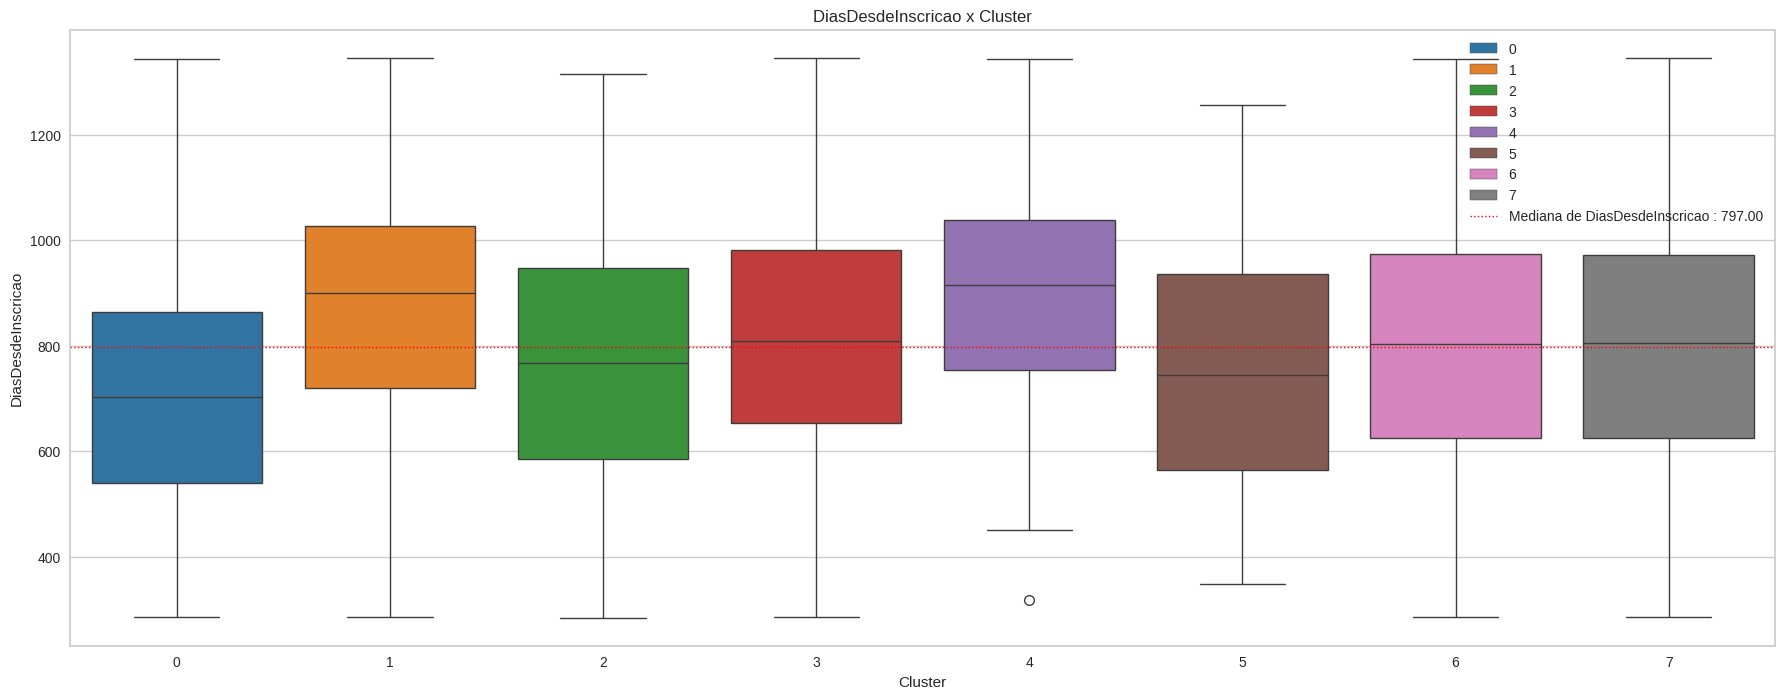

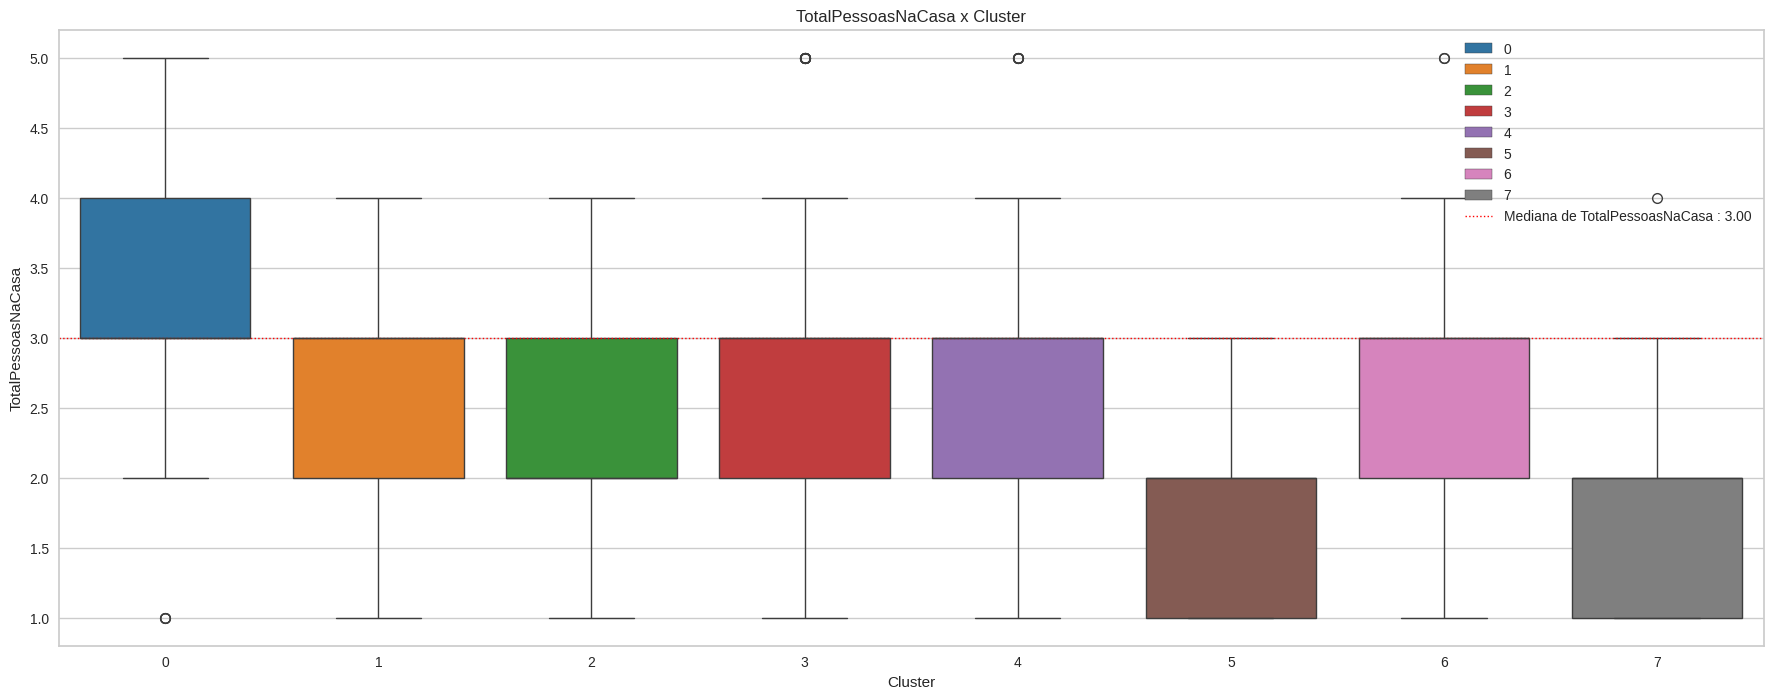

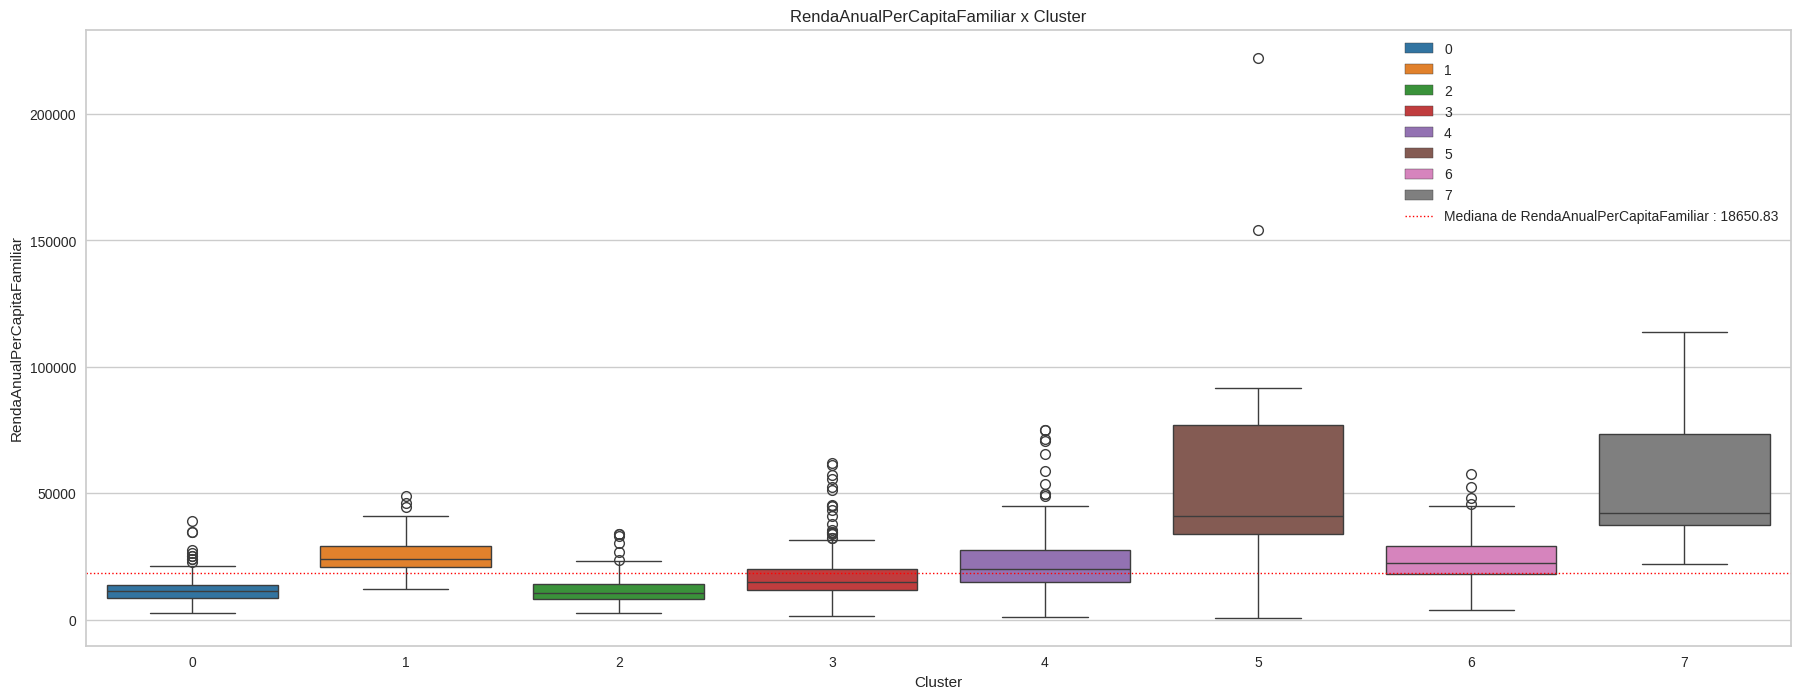

In [ ]:
vars2 = list(num_attributes.columns).copy()

vars_numericas = vars2

for var in vars_numericas:
  plt.figure(figsize=(22, 8))
  pl=sns.boxplot(x=df_publico["Cluster"], y=df_publico[var], palette= pal, hue=df_publico["Cluster"])

  mediana = df_publico[var].median()
  # Adicionando uma linha indicando a média da variável de aceitacao
  text = f'Mediana de {var} :'+' {:.2f}'.format(mediana)
  plt.axhline(mediana, color='red', linestyle='dotted', linewidth=1, label=text)

  pl.set_title(f"{var} x Cluster")
  plt.legend()
  plt.show()

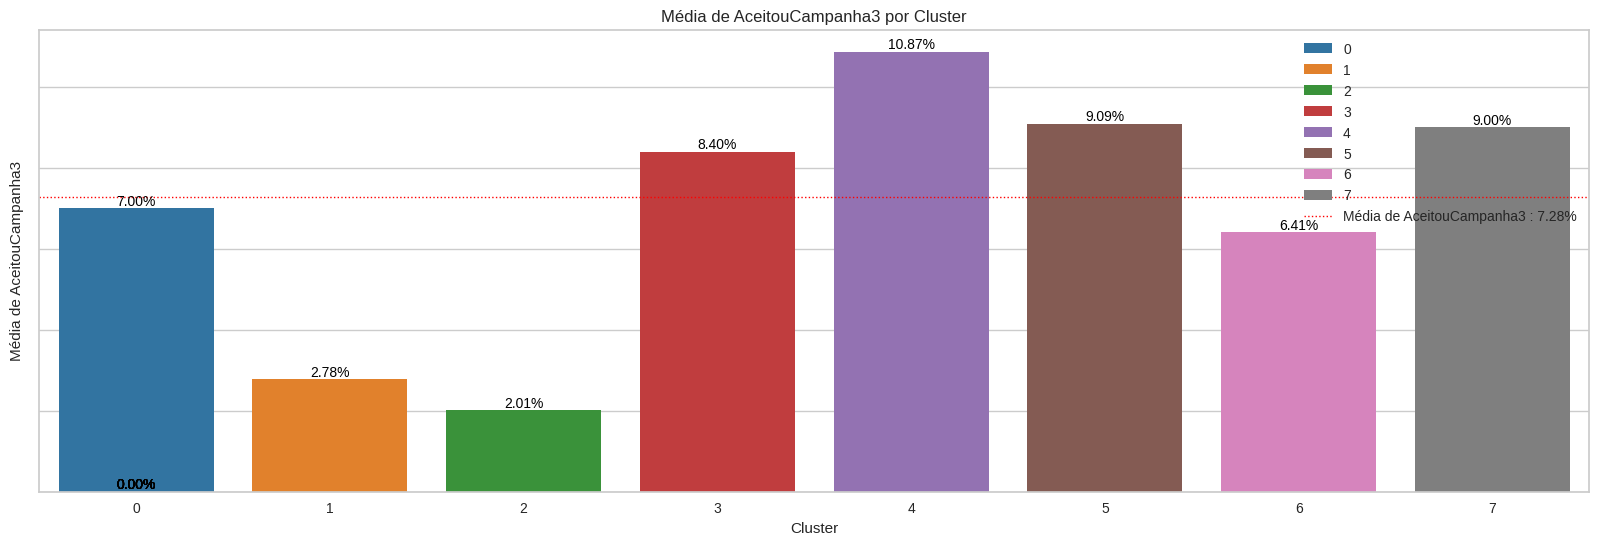

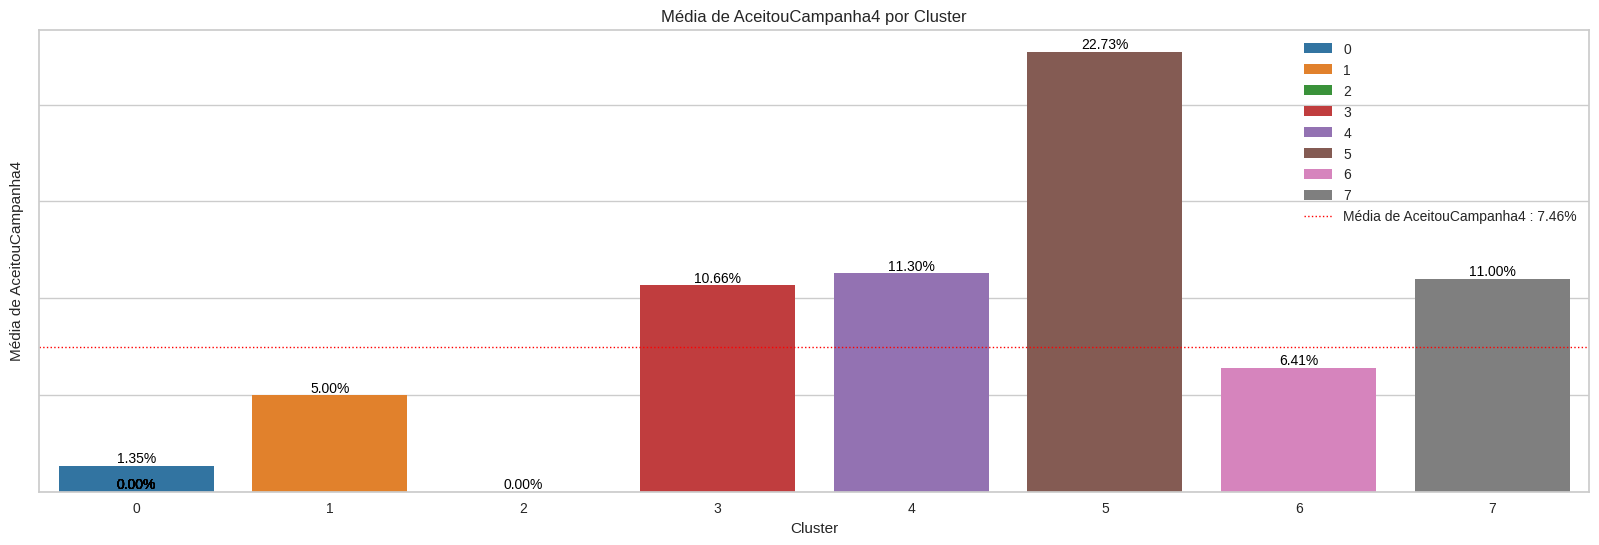

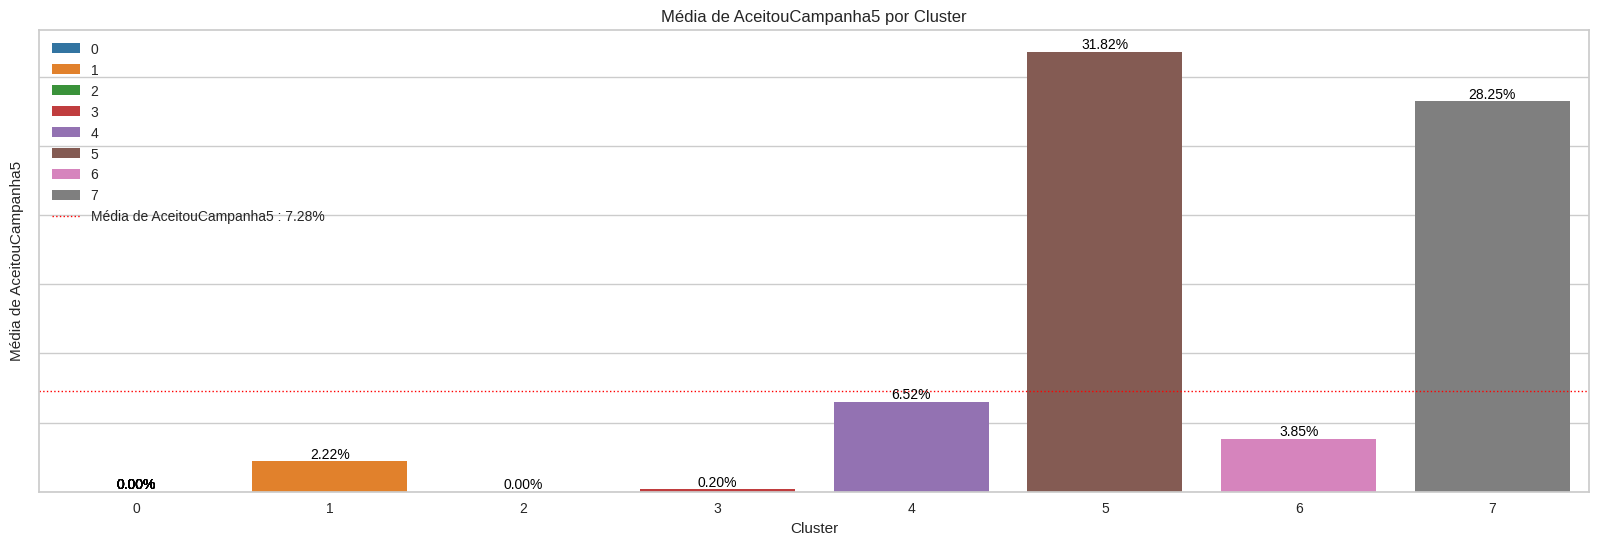

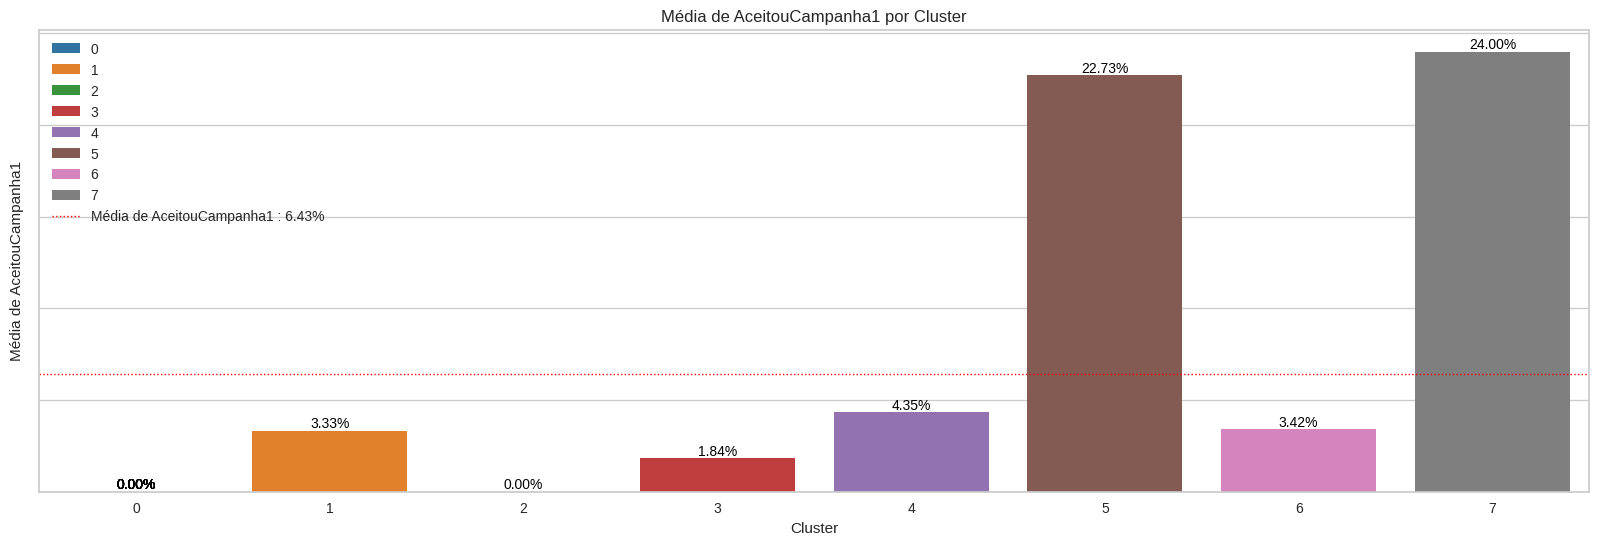

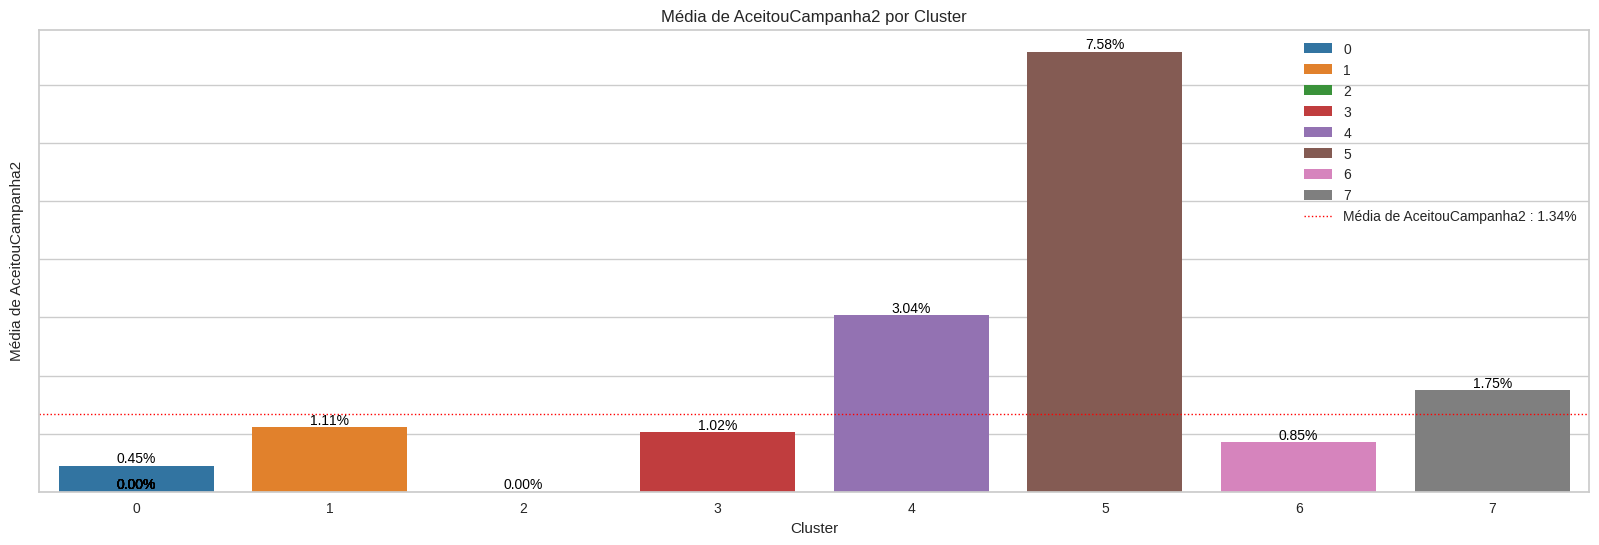

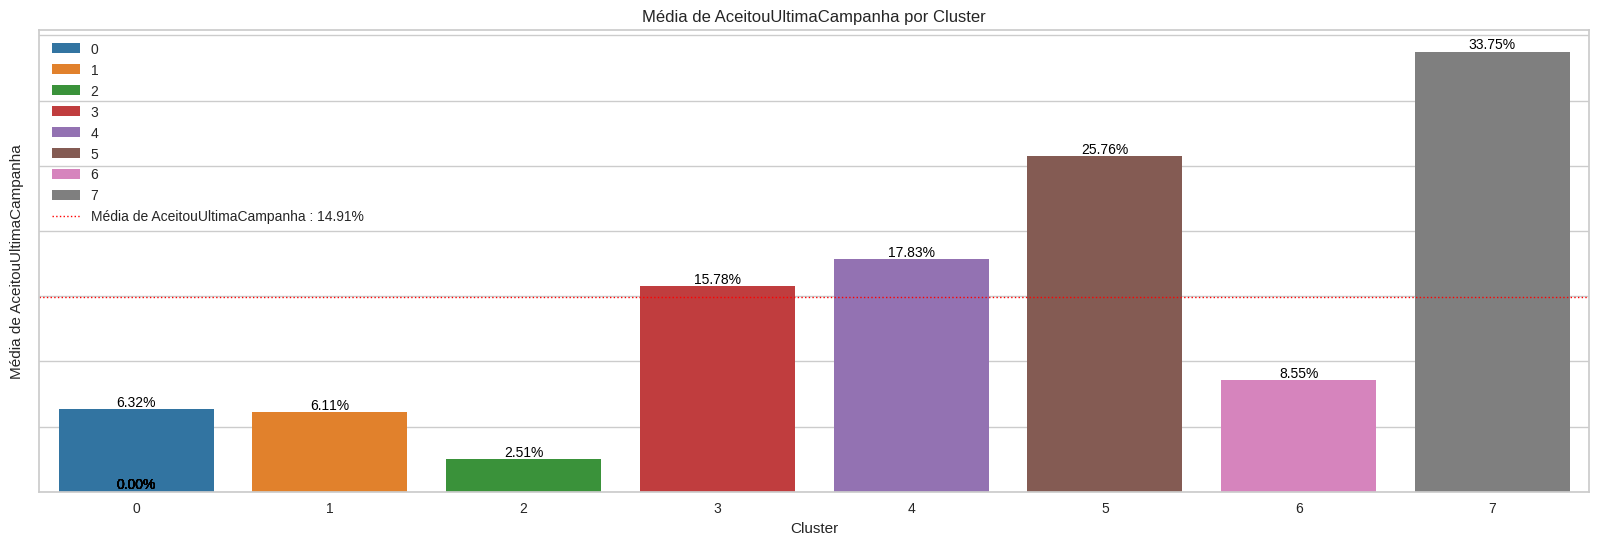

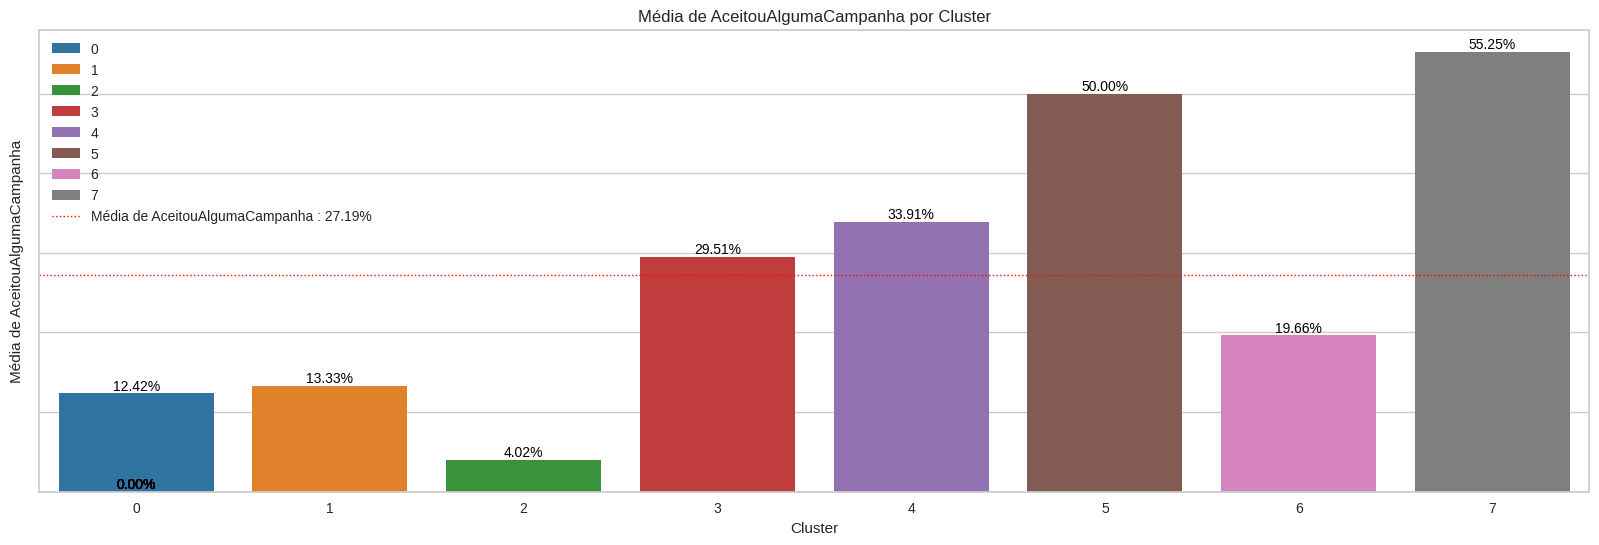

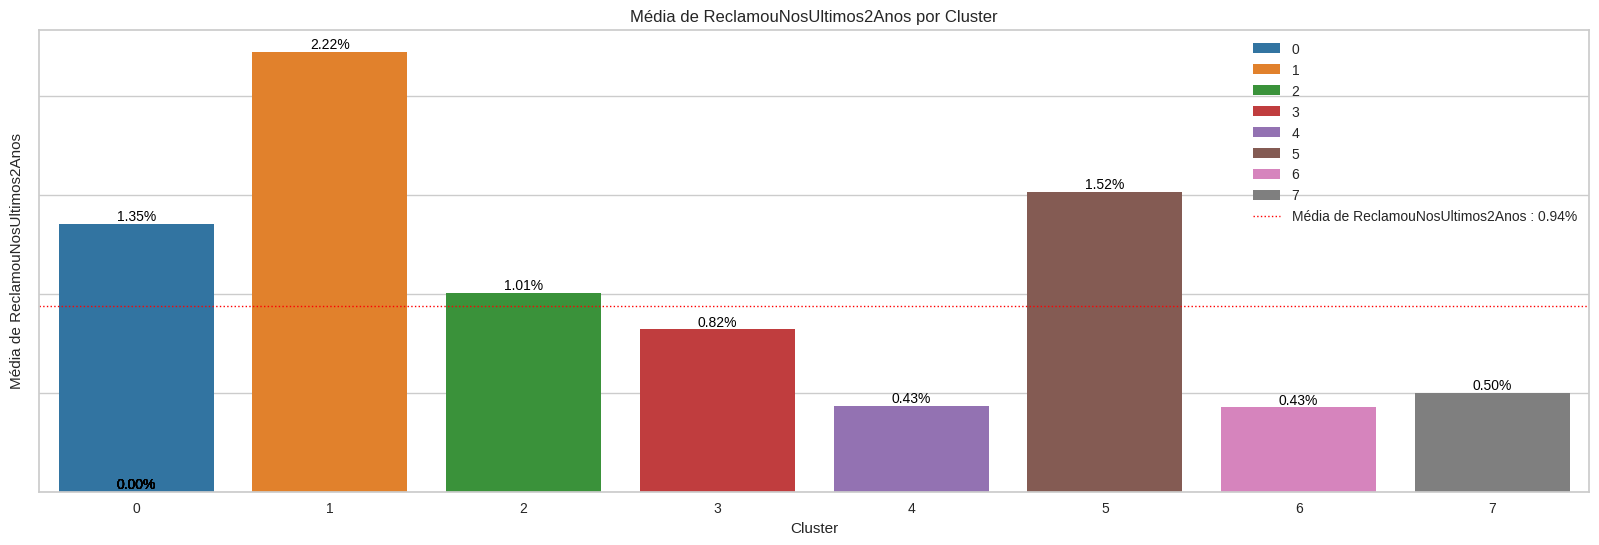

In [ ]:
filtered_vars = [var for var in vars2 if 'AceitouCampanha' in var or 'AceitouUltimaCampanha' in var or 'AceitouAlgumaCampanha' in var]
filtered_vars.append('ReclamouNosUltimos2Anos')

for var in filtered_vars:
    plt.figure(figsize=(20, 6))
    ax = sns.barplot(data=df_publico, x='Cluster', y=var, estimator='mean', errorbar=None, palette= pal, hue='Cluster')
    plt.title(f"Média de {var} por Cluster")
    plt.xlabel('Cluster')
    plt.ylabel(f'Média de {var}')

    media = df_publico[var].mean()
    # Adicionando uma linha indicando a média da variável de aceitacao
    text = f'Média de {var} :'+' {:.2f}%'.format(100*media)
    plt.axhline(media, color='red', linestyle='dotted', linewidth=1, label=text)

    # Adicionando os valores no topo de cada barra
    for p in ax.patches:
        ax.annotate(f'{100*p.get_height():.2f}%',
                    (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center',
                    fontsize=10, color='black',
                    xytext=(0, 5),
                    textcoords='offset points')
    plt.gca().axes.yaxis.set_ticklabels([])
    plt.legend()
    plt.show()

### Insights Gerados:

- **Renda Anual Familiar**:
  - A renda anual familiar dos clientes no Cluster 5 está totalmente acima da mediana, enquanto no Cluster 6, a maior concentração também se encontra acima da mediana.

- **Quantidade de Crianças na Casa**:
  - Tanto o Cluster 5 quanto o Cluster 6 apresentam uma mediana de 0 crianças. Contudo, no Cluster 6, há outliers com uma criança na casa.

- **Quantidade de Adolescentes na Casa**:
  - O Cluster 5 não apresenta adolescentes na casa. Já o Cluster 6 possui uma grande concentração de lares com 1 adolescente, podendo chegar a até 2 adolescentes por casa.

- **Dias Desde a Última Compra**:
  - Todos os clusters estão próximos à mediana geral.

- **Gasto com Vinho nos Últimos 2 Anos**:
  - Nos Clusters 5 e 6, a maior concentração de gastos está acima da mediana, com outliers superando 1400 unidades monetárias em vinhos.

- **Gasto com Frutas nos Últimos 2 Anos**:
  - Nos Clusters 5 e 6, os gastos com frutas estão majoritariamente acima da mediana, apresentando um consumo superior ao dos demais clusters.

- **Gasto com Carne nos Últimos 2 Anos**:
  - No Cluster 5, os gastos com carne estão sempre acima ou igual à mediana, enquanto no Cluster 6, a maior concentração também se encontra acima da mediana.

- **Gasto com Peixe nos Últimos 2 Anos**:
  - Ambos os clusters, 5 e 6, têm sua maior concentração de gastos com peixes acima da mediana.

- **Gasto com Doces nos Últimos 2 Anos**:
  - Os Clusters 5 e 6 também apresentam maior concentração de gastos com doces acima da mediana.

- **Gasto com Ouro nos Últimos 2 Anos**:
  - Os gastos com ouro nos Clusters 5 e 6 estão concentrados acima da mediana.

- **Compras com Desconto**:
  - O Cluster 5 não realiza compras com desconto, enquanto no Cluster 6 esse comportamento é mais dividido entre quem compra e quem não compra com desconto.

- **Compras no Website**:
  - A maior parte do Cluster 6 realiza compras no website, enquanto no Cluster 5 esse comportamento também ocorre, mas com menor frequência.

- **Compras por Catálogo**:
  - No Cluster 5, as compras por catálogo estão sempre iguais ou superiores à mediana, enquanto no Cluster 6, há uma grande concentração de consumidores nesse tipo de compra.

- **Compras na Loja**:
  - A maior concentração de compras na loja está acima da mediana em ambos os clusters.

- **Visitas ao Site no Último Mês**:
  - No Cluster 5, quase todas as visitas ao site estão abaixo da mediana, com alguns outliers. No Cluster 6, uma parte do público está acima da mediana.

- **Aceitou Campanha 3**:
  - O Cluster 6 tem uma taxa de aceitação de 8,00%, enquanto o Cluster 5 apresenta 7,24%, ambas ligeiramente abaixo da média de 7,28%.

- **Aceitou Campanha 4**:
  - O Cluster 5 apresenta uma taxa de aceitação de 10,34%, enquanto o Cluster 6 tem 10,50%. Ambos estão acima da média de 7,46%.

- **Aceitou Campanha 5**:
  - O Cluster 5 apresenta a maior taxa de aceitação entre todos os clusters, com 27,39%. Já o Cluster 6 apresenta uma taxa de 9,50%. Ambos estão acima da média de 7,28%.

- **Aceitou Campanha 1**:
  - O Cluster 5 apresenta uma taxa de aceitação de 20,41%, enquanto o Cluster 6 apresenta 10,00%. Ambos estão acima da média de 6,43%.

- **Aceitou Campanha 2**:
  - O Cluster 5 apresenta uma taxa de aceitação de 2,07%, enquanto o Cluster 6 tem 1,50%. Ambas estão acima da média de 1,34%.

- **Reclamou nos Últimos 2 Anos**:
  - O Cluster 5 tem uma taxa de reclamação de 0,78%, abaixo da média de 0,94%, enquanto o Cluster 6 apresenta uma taxa de 1,00%.

- **Aceitou Última Campanha**:
  - O Cluster 5 apresenta uma taxa de aceitação de 28,42%, enquanto o Cluster 6 tem 18,25%. Ambos estão acima da média de 14,91%.

- **Idade**:
  - Os Clusters 5 e 6 apresentam comportamento semelhante, com a concentração de idades dividida entre abaixo e acima da mediana.

- **Dias Desde a Inscrição**:
  - No Cluster 5, pouco mais da metade dos clientes está abaixo da mediana, enquanto no Cluster 6, a maior concentração está acima da mediana.

- **Total de Pessoas na Casa**:
  - No Cluster 5, a concentração é de até 2 pessoas por casa, abaixo da mediana. No Cluster 6, há um grande volume entre 2 e 3 pessoas, com uma concentração de 4 pessoas e um outlier de 5 pessoas na casa.

- **Renda Anual Per Capita Familiar**:
  - O Cluster 5 está completamente acima da mediana, e no Cluster 6, a maior concentração também está acima da mediana.


# Considerações Finais

Principais insights:
  * Os clusters com maior taxa de aceitacao são o 1, 3 e 5;
  * As principais características do cluster 1 são:
    * A maior parte dos clientes são casados, além disso há um percentual elevado de viúvos quando comparado aos demais clusters;
    * Apresenta renda anual familiar maior que a mediana dos clientes;
    * A quantidade de crianças na residência tende a estar entre 0 e 1 em que a mediana é igual a 0;
    * A quantidade de adolescentes na residência tende a estar entre 0 e 1 em que a mediana é igual a 1;
    * A quantidade de dias desde a última compra tende a ser maior que a mediana dos clientes;
    * Tendem a ter gasto com vinhos, frutas, carne e ouro superior a mediana dos clientes;
    * Apresentam gasto com doces menor que a mediana dos clientes;
    * Gasto com ouro acima da mediana dos clientes;
    * Gasto com peixes acima da mediana dos clientes;
    * Quantidade de compras com desconto acima da mediana dos clientes;
    * Tem um elevado número de compras por website em comparação com os demais clusters;
    * Quantidade de compras por catálogo levemente acima da mediana dos clientes;
    * Quantidade de compras na loja acima da mediana dos clientes;
    * Quantidade de visitas ao site no último mês igual a mediana dos clientes;
    * 10,27% de aceitação à campanha 1;
    * 4,45% de aceitação à campanha 2;
    * 17,12% de aceitação à campanha 3;
    * 24,32% de aceitação à campanha 4;
    * 9,93% de aceitação à campanha 5;
    * 23,97% de aceitação à última campanha;
    * 55,82% de aceitação à alguma campanha;
    * Mediana de idade (55 anos) bem próxima da mediana dos clientes (54 anos);
    * Corresponde ao cluster que contém os clientes mais antigos (maior quantidade de dias de inscrição);
    * Mediana da quantidade total de pessoas em casa igual a 3;
    * Mediana de renda anual familiar per capita levemente superior à mediana dos clientes;
    * 0,68% dos clientes fizeram reclamação nos últimos 2 anos.
  * As principais características do cluster 3 são:
    * A maior parte dos clientes são casados, além disso há um percentual elevado de solteiros quando comparado aos demais clusters;
    * Apresenta renda anual familiar maior que a mediana dos clientes;
    * Não há crianças nas residências desses clientes;
    * Não há adolescentes nas residências desses clientes;
    * A quantidade de dias desde a última compra tende a ser maior que a mediana dos clientes;
    * Tendem a ter gasto com vinhos, frutas, carne, doce, ouro e peixes superior a mediana dos clientes. Destaca-se este cluster apresentar o maior gasto com frutas, o maior gasto com peixes, a segunda maior mediana de gasto com carne, a maior mediana de gasto com doces;
    * Tem a menor mediana da quantidade de compras com desconto;
    * Tem um número de compras por website maior que a mediana dos clientes;
    * Apresenta a segunda maior mediana da quantidade de compras por catálogo;
    * Elevada quantidade de compras na loja comparado aos demais clusters;
    * Quantidade de visitas ao site no último mês inferior à mediana dos clientes;
    * 21,41% de aceitação à campanha 1 (maior aceitação dentre os clusters);
    * 2,83% de aceitação à campanha 2;
    * 7,88% de aceitação à campanha 3;
    * 11,92% de aceitação à campanha 4;
    * 27,07% de aceitação à campanha 5;
    * 29,9% de aceitação à última campanha;
    * 51,31% de aceitação à alguma campanha;
    * Mediana de idade (55 anos) bem próxima da mediana dos clientes (54 anos);
    * Mediana da quantidade de dias de inscrição levemente inferior à mediana dos clientes;
    * Menor mediana da quantidade total de pessoas em casa;
    * Segunda maior mediana de renda anual familiar per capita dentre os clusters;
    * 0,61% dos clientes fizeram reclamação nos últimos 2 anos.
  * As principais características do cluster 5 são:
    * A maior parte dos clientes são casados;
    * Maior concentração percentual de mestres;
    * Apresenta renda anual familiar menor que a mediana dos clientes;
    * A quantidade de crianças na residência tende a estar entre 0 e 1 em que a mediana é igual a 1;
    * A quantidade de adolescentes na residência tende a estar entre 0 e 1 em que a mediana é igual a 1;
    * A quantidade de dias desde a última compra tende a ser levemente inferior à mediana dos clientes;
    * A mediana de gasto com vinhos, frutas, carne, doces  é inferior à mediana dos clientes;
     frutas, carne e ouro superior a mediana dos clientes;
    * Apresentam gasto com doces menor que a mediana dos clientes;
    * Gasto com ouro acima da mediana dos clientes;
    * Gasto com peixes inferior da mediana dos clientes;
    * Quantidade de compras com desconto acima da mediana dos clientes;
    * Tem um elevado número de compras por website em comparação com os demais clusters;
    * Quantidade de compras por catálogo levemente acima da mediana dos clientes;
    * Quantidade de compras na loja acima da mediana dos clientes;
    * Quantidade de visitas ao site no último mês igual a mediana dos clientes;
    * 10,27% de aceitação à campanha 1;
    * 4,45% de aceitação à campanha 2;
    * 17,12% de aceitação à campanha 3;
    * 24,32% de aceitação à campanha 4;
    * 9,93% de aceitação à campanha 5;
    * 23,97% de aceitação à última campanha;
    * 55,82% de aceitação à alguma campanha;
    * Mediana de idade (55 anos) bem próxima da mediana dos clientes (54 anos);
    * Corresponde ao cluster que contém os clientes mais antigos (maior quantidade de dias de inscrição);
    * Mediana da quantidade total de pessoas em casa igual a 3;
    * Mediana de renda anual familiar per capita levemente superior à mediana dos clientes;
    * 0,42% dos clientes fizeram reclamação nos últimos 2 anos.

# Considerações Finais

Principais insights:

- **Os clusters com maior taxa de aceitação geral são os clusters 5 e 7.**
  
- **As principais características do Cluster 5 são:**
  - **Perfil familiar:** A maior parte dos clientes são casados e apresentam renda anual familiar levemente superior à mediana geral.
  - **Crianças e adolescentes:** A mediana de crianças e adolescentes nas residências é igual a 0.
  - **Gastos:**
    - O cluster 5 apresenta a segunda maior mediana de gasto com carne, além de gastos com vinhos, frutas e peixes superiores à mediana geral.
    - Apresenta gasto com doces abaixo da mediana.
  - **Compras:**
    - Realizam mais compras online em comparação aos outros clusters.
    - A mediana de compras na loja é superior à mediana geral.
    - Compras por catálogo e com desconto estão ligeiramente acima da mediana.
  - **Taxas de aceitação de campanhas:**
    - Campanha 3: 9,00%.
    - Campanha 4: 22,73%.
    - Campanha 5: 31,62%.
    - Última campanha: 25,76%.
  - **Demografia:**
    - Apresentam a maior mediana de idade entre os clusters.
    - A menor quantidade de dias desde a inscrição está concentrada nesse cluster.
    - A mediana da quantidade de pessoas por residência é uma das menores.
  
- **As principais características do Cluster 7 são:**
  - **Perfil familiar:** Clientes mais velhos com mediana de idade elevada.
  - **Crianças e adolescentes:** Não há crianças nas residências e a mediana de adolescentes é 0.
  - **Gastos:**
    - O maior gasto com carne e peixe entre todos os clusters.
    - O maior gasto com doces.
    - Gasto com vinho e frutas também acima da mediana.
  - **Compras:**
    - Maior quantidade de compras por catálogo.
    - Menor quantidade de compras no site e visitas ao site.
  - **Taxas de aceitação de campanhas:**
    - Campanha 3: 9,00%.
    - Campanha 5: 28,25%.
    - Última campanha: 31,75%.
  - **Demografia:**
    - Mediana de renda anual per capita familiar acima da mediana geral.
    - A menor quantidade de visitas ao site entre todos os clusters.
    - A menor mediana de pessoas por residência.

Essas considerações fornecem uma visão clara dos perfis distintos dos clusters 5 e 7, destacando suas preferências de compras, aceitação de campanhas e características demográficas.
